# Phase 1 - Exploratory Data Analysis

## Dataset Description
The data contain one row for each unique specialization subscription. For each subscription, a single observation (subscription_id) is included as of a particular date (observation_dt) during which the subscription was active. This date was chosen at random from all the dates during which the subscription was active. In some instances it is soon after the subscription was initiated; in other instances, it is several months after the subscription was initiated and after several previous payments were made. Therefore, your model will have to be able to adapt to different stages of the subscription.

Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [8]:
import pandas as pd

data_descriptions = pd.read_csv('Data//data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,subscription_id,Identifier,character,Unique identifier of each subscription
1,observation_dt,Identifier,date,The date on which the subscription was observed to calculate the features in the dataset. It was chosen at random amongst all the dates between the start of the subscription and the end of the subscription (before cancellation)
2,is_retained,Target,Integer,"0 = the learner cancelled their subscription before next payment, 1 = the learner made an additional payment in this subscription"
3,specialization_id,Feature - Specialization Info,character,Unique identifier of a specialization (each subscription gives a learner access to a particular specialization)
4,cnt_courses_in_specialization,Feature - Specialization Info,integer,number of courses in the specialization
5,specialization_domain,Feature - Specialization Info,character,"primary domain of the specialization (Computer Science, Data Science, etc.)"
6,is_professional_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""professional certicate"" (a special type of specialization that awards completers with an industry-sponsored credential)"
7,is_gateway_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""gateway certificate"" (a special type of specialization geared towards learners starting in a new field)"
8,learner_days_since_registration,Feature - Learner Info,integer,Days from coursera registration date to the date on which the observation is made
9,learner_country_group,Feature - Learner Info,character,"the region of the world that the learner is from (United States, East Asia, etc.)"


## Import Required Packages

In [9]:
# Standard Python packages
from math import sqrt

# Data packages
import pandas as pd
import numpy as np

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Statisticsl inference package
from scipy import stats
from scipy.stats import t, chi2, norm, f


## Load and Explore the Data

In [10]:
df0 = pd.read_csv('Data//Coursera.csv')#, low_memory=False)
df0.shape

C:\Users\Adak\AppData\Local\Temp\ipykernel_9460\696881836.py:1: DtypeWarning: Columns (6,7,25,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv('Data//Coursera.csv')#, low_memory=False)


(413955, 37)

I am getting the warning because boolean columns have some `nan` values. Due to the nans, pandas can't infer these column types, so it warns and returns the columns as `object`.<br>
To solve the problem, I remove the `nans` and then change the columns types to `bool` in the next steps.<br>
Now, let's explore the boolean columns that caused the warning.

In [11]:
df0.dtypes.iloc[[6,7,25,31]]

is_professional_certificate                object
is_gateway_certificate                     object
is_subscription_started_with_free_trial    object
is_active_capstone_during_pay_period       object
dtype: object

In [12]:
for i in df0.dtypes.iloc[[6,7,25,31]].index:
    print(f"Unique values in column {i}: {df0[i].unique()}")


Unique values in column is_professional_certificate: [True False nan]
Unique values in column is_gateway_certificate: [True False nan]
Unique values in column is_subscription_started_with_free_trial: [False True nan]
Unique values in column is_active_capstone_during_pay_period: [False True nan]


In [13]:
df0.head()

,subscription_id,observation_dt,is_retained,specialization_id,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,...,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
0,--rKikbGEeyQHQqIvaM5IQ,2022-05-04,1.0,kr43OcbTEeqeNBKhfgCLyw,8.0,Data Science,True,True,2321.0,Northern Europe,...,0.0,0.0,0.0,0.0,False,73.783333,0.000000,68.0,0.0,20.0
1,-0XGzEq2EeyimBISGRuNeQ,2021-11-30,0.0,Q0Fc_Yl0EeqdTApgQ4tM7Q,6.0,Data Science,True,False,612.0,Northern Europe,...,0.0,0.0,0.0,0.0,False,0.850000,0.000000,7.0,2.0,0.0
2,-1P9kOb6EeuRugq1Liq62w,2021-08-13,0.0,9kmimrDIEeqxzQqieMm42w,6.0,Business,True,True,27.0,Australia and New Zealand,...,0.0,1.0,12.0,2.0,False,1.833333,2.983333,2.0,1.0,18.0
3,-2ifTJZbEeuIuRKpAhovaw,2021-08-03,1.0,7lHCSlFIEeeffRIHljDI_g,5.0,Information Technology,True,True,120.0,United States,...,0.0,2.0,83.0,9.0,False,18.450000,7.100000,18.0,4.0,3.0
4,-5YKZbchEeufeAq6C_fAOw,2021-06-04,0.0,kr43OcbTEeqeNBKhfgCLyw,8.0,Data Science,True,True,1228.0,India,...,1.0,1.0,61.0,4.0,False,29.566667,15.250000,18.0,8.0,1.0


### Check for Data Types
The output shows that we have one or two null values in most of the columns.

In [14]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413955 entries, 0 to 413954
Data columns (total 37 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   subscription_id                                   413955 non-null  object 
 1   observation_dt                                    413955 non-null  object 
 2   is_retained                                       413954 non-null  float64
 3   specialization_id                                 413954 non-null  object 
 4   cnt_courses_in_specialization                     413954 non-null  float64
 5   specialization_domain                             413953 non-null  object 
 6   is_professional_certificate                       413954 non-null  object 
 7   is_gateway_certificate                            413954 non-null  object 
 8   learner_days_since_registration                   413954 non-null  float64
 9   lear

### Check for Distributions

In [15]:
df0.describe()

,is_retained,cnt_courses_in_specialization,learner_days_since_registration,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,learner_cnt_other_courses_paid_items_completed,learner_cnt_other_transactions_past,learner_other_revenue,subscription_period_order,...,cnt_enrollments_started_during_payment_period,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
count,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,...,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000
mean,0.543664,5.926637,745.106720,5.421735,1.281524,114.289404,62.943846,1.966615,101.281442,2.477217,...,0.285387,0.235050,0.681228,21.015035,1.743264,15.596039,3.474727,12.474867,2.585720,29.130662
std,0.498090,1.759559,950.799959,13.819034,3.743262,303.469641,194.269892,6.517240,353.679851,2.352873,...,0.720924,0.655434,0.949700,50.313201,4.422363,27.338616,8.412757,18.937620,4.062454,52.340933
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.150000,0.000000,2.000000,0.000000,1.000000
50%,1.000000,6.000000,279.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.183333,0.000000,6.000000,1.000000,9.000000
75%,1.000000,7.000000,1109.000000,4.000000,1.000000,90.000000,13.000000,1.000000,49.000000,3.000000,...,0.000000,0.000000,1.000000,20.000000,2.000000,18.633333,3.533333,15.000000,4.000000,32.000000
max,1.000000,13.000000,3857.000000,604.000000,215.000000,19439.000000,6912.000000,474.000000,24069.920000,19.000000,...,13.000000,10.000000,11.000000,1043.000000,149.000000,2375.683333,1393.300000,616.000000,31.000000,548.000000


## Clean the Data
### Handle Duplicates
If you want to identify and remove duplicate rows in a DataFrame, there are two methods that will help: `duplicated`
and `drop_duplicates`. Each takes as an argument the columns to use to identify duplicated rows.
- `duplicated` returns a boolean vector whose length is the number of rows, and which indicates whether a row
is duplicated.
- `drop_duplicates` removes duplicate rows.

<br>By default, the first observed row of a duplicate set is considered unique, but each method has a `keep` parameter to
specify targets to be kept.
- keep='first' (default): mark / drop duplicates except for the first occurrence.
- keep='last': mark / drop duplicates except for the last occurrence.
- keep=False: mark / drop all duplicates.

In [16]:
df0.duplicated().sum()
# df0[df0.duplicated()]
# df1 = df0.drop_duplicates(["col1", "col2"], keep='first')

np.int64(0)

We have no duplicates in this data.

### Handle null Values
We have very few null values that can be removed safely.

In [17]:
# df0.isnull().sum(axis=0)
df0.isna().sum()

subscription_id                                     0
observation_dt                                      0
is_retained                                         1
specialization_id                                   1
cnt_courses_in_specialization                       1
specialization_domain                               2
is_professional_certificate                         1
is_gateway_certificate                              1
learner_days_since_registration                     1
learner_country_group                               1
learner_gender                                      1
learner_cnt_other_courses_active                    1
learner_cnt_other_courses_paid_active               1
learner_cnt_other_courses_items_completed           1
learner_cnt_other_courses_paid_items_completed      1
learner_cnt_other_transactions_past                 1
learner_other_revenue                               1
subscription_period_order                           1
days_since_last_payment     

In [18]:
# Remove nans
df0 = df0.dropna()
df0.isna().sum()
# df0.info()


subscription_id                                     0
observation_dt                                      0
is_retained                                         0
specialization_id                                   0
cnt_courses_in_specialization                       0
specialization_domain                               0
is_professional_certificate                         0
is_gateway_certificate                              0
learner_days_since_registration                     0
learner_country_group                               0
learner_gender                                      0
learner_cnt_other_courses_active                    0
learner_cnt_other_courses_paid_active               0
learner_cnt_other_courses_items_completed           0
learner_cnt_other_courses_paid_items_completed      0
learner_cnt_other_transactions_past                 0
learner_other_revenue                               0
subscription_period_order                           0
days_since_last_payment     

The nans are successfully removed. Let's check what happened to the `bool` columns.

In [19]:
for i in df0.dtypes.iloc[[6,7,25,31]].index:
    print(f"Unique values in column {i}: {df0[i].unique()}")


Unique values in column is_professional_certificate: [True False]
Unique values in column is_gateway_certificate: [True False]
Unique values in column is_subscription_started_with_free_trial: [False True]
Unique values in column is_active_capstone_during_pay_period: [False True]


After removing the nans, the `bool` columns contain only True and False. But their type is still object.

### Change Relevant Columns to Type bool

In [20]:
bool_cols = ['is_professional_certificate', 'is_gateway_certificate',
       'is_subscription_started_with_free_trial', 'is_active_capstone_during_pay_period']
df1 = df0.copy()
for col in bool_cols:
    df1[col] = df1[col].astype("bool")

print("\nColumns types:")
print(df1[bool_cols].dtypes)


Columns types:
is_professional_certificate                bool
is_gateway_certificate                     bool
is_subscription_started_with_free_trial    bool
is_active_capstone_during_pay_period       bool
dtype: object


### Change Relevant Columns to Type Categorical
We have four categorical columns in the data that are rocognized as type object. It's a good practice to change them to categorical type. For large datasets, this makes the data size smaller, although it may not be considerable for small and medium size datasets.

In [21]:
categorical_cols = ['specialization_id', 'specialization_domain', 'learner_country_group', 'learner_gender']

print(f"Size of df1 on disk: {df1.size}")
print("\nColumns types:")
print(df1[categorical_cols].dtypes)


Size of df1 on disk: 15316261

Columns types:
specialization_id        object
specialization_domain    object
learner_country_group    object
learner_gender           object
dtype: object


In [22]:
for col in categorical_cols:
    df1[col] = df1[col].astype("category")
    
print(f"Size of df1 on disk: {df1.size}")
print("\nColumns types:")
print(df1[categorical_cols].dtypes)


Size of df1 on disk: 15316261

Columns types:
specialization_id        category
specialization_domain    category
learner_country_group    category
learner_gender           category
dtype: object


### Change Relevant Columns to Type Datetime 

In [23]:
df1['observation_dt'] = pd.to_datetime(df1['observation_dt'])
df1['observation_dt'].dtypes

dtype('<M8[ns]')

In [24]:
df1.dtypes

subscription_id                                             object
observation_dt                                      datetime64[ns]
is_retained                                                float64
specialization_id                                         category
cnt_courses_in_specialization                              float64
specialization_domain                                     category
is_professional_certificate                                   bool
is_gateway_certificate                                        bool
learner_days_since_registration                            float64
learner_country_group                                     category
learner_gender                                            category
learner_cnt_other_courses_active                           float64
learner_cnt_other_courses_paid_active                      float64
learner_cnt_other_courses_items_completed                  float64
learner_cnt_other_courses_paid_items_completed             flo

In [25]:
df1.dtypes

subscription_id                                             object
observation_dt                                      datetime64[ns]
is_retained                                                float64
specialization_id                                         category
cnt_courses_in_specialization                              float64
specialization_domain                                     category
is_professional_certificate                                   bool
is_gateway_certificate                                        bool
learner_days_since_registration                            float64
learner_country_group                                     category
learner_gender                                            category
learner_cnt_other_courses_active                           float64
learner_cnt_other_courses_paid_active                      float64
learner_cnt_other_courses_items_completed                  float64
learner_cnt_other_courses_paid_items_completed             flo

In [26]:
df1.shape

(413953, 37)

## Utility Functions for Visulization
In the next part of this project, I'm going to explore the data in a deeper level using charts and graphs. When we find ourselves copy-pasting code for grouping and visualizing data, the best practice is defining functions to avoid repeating copy-pasting codes.

### Group

In [27]:
def grouping(df, columns):
    if len(columns) == 1:
        g = (df[columns[0]].value_counts(normalize=True) * 100).round(2)
        return g.sort_values(ascending=False)
    else:
        g = df.groupby(columns, observed=True).size().unstack()
        g = g.fillna(0)
        total = g.sum(axis=1)
        for col in g.columns:
            col_str = f'{col}%'
            g[col_str] = ((g[col] / total) * 100).round(2)
        by = g.columns[-1]
        return g.sort_values(by, ascending=False)


### Pie

In [28]:
def paing(df, column, lbl=[], size=(3,3), colors = ['#36ad82','#b52b5e']):
    d=df[column].value_counts()
    if not lbl:
        lbl = list(d.index)
    l = list(zip(lbl, d.values))
    labels =[f'{i}: {j}' for i,j in l]
    fig = plt.figure(figsize=(3,3))
    plt.pie(d, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title(col);

### Bar

In [29]:
def baring(df, columns, size=(8,4), annotate=True, colors = ['#b52b5e', '#36ad82'], grid=True, stacked=False):
    if len(columns) > 1:
        g = grouping(df, columns).iloc[:,-2:]
        title = f"{columns[0]} vs {columns[1]}"
    else:
        g = grouping(df, columns)
        title = f"{columns[0]}"
        colors = [colors[1]]
        
    ax = g.plot(kind='barh', color=colors, figsize=size, rot=0, width=0.85, stacked=stacked,
                                        xlabel='Percenrage', ylabel=f"{columns[0]}", title=title)

    if annotate:
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            if width == 0:
                continue
            ax.text(x+width/2, y+height/2, '{:.0f} %'.format(width), 
                    horizontalalignment='left', verticalalignment='center')

### Histogram

In [30]:
def histing(df, columns, size=(5,3)):
    plt.figure(figsize=size)
    if type(df) == pd.core.series.Series:
        h = sns.histplot(x=df)
        median = df.median()
    else:
        h = sns.histplot(x=df[columns])
        median = df[columns].median()
    plt.axvline(median, color='red', linestyle='--')
    heights = [i.get_height() for i in h.patches]
    x = median + 50
    y = max(heights) * 0.66
    print(x,y)
    plt.text(x, y, f'median={median}', color='red')
    plt.title(columns);

### Scatter Plot

In [31]:
def scattering(df, columns, size=(5,3)):
    plt.figure(figsize=size)
    sns.scatterplot(data=df, x=columns[0], y=columns[1])
    plt.title(f"{columns[0]} vs {columns[1]}")

### Box Plot

In [32]:
def boxing(df,columns, size=(5,1)):
    plt.figure(figsize=size)
    sns.boxplot(x=df[columns], fliersize=1)
    plt.title(columns);

## Utility Functions for Statisticsl Inference
### f-test of Two Population Variances

In [33]:
def f_test_variance(df, column, target, significance=0.95):
    sample1 = df[df[target] == True]
    sample2 = df[df[target] == False]

    n1 = sample1.shape[0]
    n2 = sample2.shape[0]
    nu1 = n1 - 1
    nu2 = n2 - 1

    variance1 = np.var(sample1[column], ddof=1, axis=0)
    variance2 = np.var(sample2[column], ddof=1, axis=0)
    
    f_statistics = variance1 / variance2

    left_sig = (1 - significance) / 2
    right_sig = 1 - left_sig
    # print(f"Significance interval = ({left_sig}, {right_sig})")
    
    left_rejection = f.ppf(left_sig, nu1, nu2)
    right_rejection = f.ppf(right_sig, nu1, nu2) # = 1/left_rejection
    
    print(f"Rejection Region = ({round(left_rejection,2)}, {round(right_rejection,2)})")
    print(f"f statistics = {round(f_statistics,2)}")
 
    if f_statistics > left_rejection and f_statistics < right_rejection:
        print("\nPopulation variances are equal.")
        return True
    else:
        print("\nPopulation variances are not equal.")
        return False


### t-test of Two Population Means - using stats.ttest

In [34]:
def t_test_mean(df, column, target, significance = 0.05):
    sample1 = df[df[target] == True]
    sample2 = df[df[target] == False]

    equal_variance = f_test_variance(df, column, target)
    ttest = stats.ttest_ind(sample1[column], sample2[column], equal_var=equal_variance)
    print("ttest output", ttest)
    p_value = ttest.pvalue
    
    msg_accept = f"""The p-value in this case is {p_value}, which is above the standard thresholds of {significance}. So we don't reject the null hypothesis in favor of the alternative hypothesis and say there is no statistically significant difference in mean {columns} between churned and retained learners."""
    msg_reject = f"""The p-value in this case is {p_value}, which is below the standard thresholds of {significance}. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean {columns} between churned and retained learners."""
    
    print(f"Mean of retained: {round(sample1[column].mean(),1)}")
    print(f"Mean of churned: {round(sample2[column].mean(),1)}")
    print(f"Mean of all: {round(df[column].mean(),1)}")
    
    print(f"\nMedian of retained: {round(sample1[column].median(),1)}")
    print(f"Median of churned: {round(sample2[column].median(),1)}")
    print(f"Median of all: {round(df[column].median(),1)}")
    
    print(f"\nSTD of retained: {round(sample1[column].std(),1)}")
    print(f"STD of churned: {round(sample2[column].std(),1)}")
    print(f"STD of all: {round(df[columns].std(),1)}")

    if p_value > significance:
        return msg_accept
    else:
        return msg_reject


### t-test of Two Population Means - manual

In [35]:
def t_test_mean_manual(df, column, target, significance=0.95):
    
    sample1 = df[df[target] == True]
    sample2 = df[df[target] == False]

    n1 = sample1.shape[0]
    n2 = sample2.shape[0]
    nu1 = n1 - 1
    nu2 = n2 - 1
    dof = nu1 + nu2
    mu1 = mu2 = 0
    
    variance1 = np.var(sample1[column], ddof=1, axis=0)
    variance2 = np.var(sample2[column], ddof=1, axis=0)
    mean1 = np.mean(sample1[column], axis=0)
    mean2 = np.mean(sample2[column], axis=0)
    print(f"Variance1 = {variance1}, Variance2 = {variance2}")
    print(f"Mean1 = {mean1}, Mean2 = {mean2}")

    left_sig = (1 - significance) / 2
    right_sig = 1 - left_sig
    print(f"Significance Interval = ({left_sig}, {right_sig})")

    variances_equal = f_test_variance(df, column, target, significance=significance)

    if variances_equal:
        pooled_variance = (nu1 * variance1 + nu2 * variance2) / (nu1 + nu2)
        # print(f"Pooled Variance = {pooled_variance}")
        left_rejection = t.ppf(left_sig, df = dof)
        right_rejection = t.ppf(right_sig, df = dof)
        
        t_statistics = ((mean1 - mean2 ) - (mu1 - mu2)) / sqrt(pooled_variance * (1/n1 + 1/n2))
        print(f"t statistics = {t_statistics}")
        print(f"Rejection Criteria: t statistics not in the ({left_rejection}, {right_rejection}) interval")

    else:
        nu = ((variance1/n1 + variance2/n2)**2) / ((variance1 / n1)**2 / nu1 + 
                                                    (variance2/n2)**2 / nu2)
        nu = np.ceil(nu)
        left_rejection = t.ppf(left_sig, df=nu)
        right_rejection = t.ppf(right_sig, df=nu)
       
        t_statistics = ((mean1 - mean2) - (mu1 - mu2)) / sqrt(variance1 / n1 + variance2 / n2)

        print(f"t statistics = {t_statistics}")
        print(f"Rejection Criteria: t statistics not in the ({left_rejection}, {right_rejection}) interval")

### z-test of Two Population Proportions

In [36]:
def z_test_two_proportions(df, column, target, significance=0.95, test=True):
    #Tally the number of successes in each sample
    sample1 = df[df[target] == True]
    sample2 = df[df[target] == False]

    n1 = sample1.shape[0]
    n2 = sample2.shape[0]
    x1 = sample1[sample1[column] == True].shape[0]
    x2 = sample2[sample2[column] == True].shape[0]
    print("n1, n2, x1, x2", n1, n2, x1, x2)
    p1 = x1 / n1
    p2 = x2 / n2
    p = (x1 + x2) / (n1 + n2)
    print(f"p1 = {round(p1,3)}, p2 = {round(p2, 3)}, p = {round(p, 3)}")
   
    z_stat = (p1 - p2) / sqrt(p * (1-p) * (1/n1 + 1/n2))
    
    left_sig = (1 - significance) / 2
    right_sig = 1 - left_sig
    print(f"Significance Interval = ({round(left_sig, 3)}, {round(right_sig, 3)})")
    z_left = norm.ppf(left_sig)
    z_right = norm.ppf(right_sig)
    
    print(f"z statistics = {z_stat}")
    print(f"The rejection criteria: z statistics not in the {round(z_left,2)}, {round(z_right, 2)} interval.")
    

## Dive Deeper into Data
### 2 `is_retained`
**0 = the learner cancelled their subscription before next payment, 1 = the learner made an additional payment in this subscription**

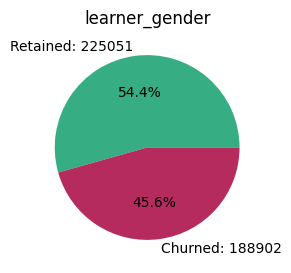

In [37]:
columns = 'is_retained'
paing(df1, columns, lbl=['Retained', 'Churned'])

The data is balanced with respect to the `is_retained` column.

### 3 `specialization_id`
**Specialization Info -	Unique identifier of a specialization (each subscription gives a learner access to a particular specialization)**<br>
It would be much better if we had the specialization names to examine which ones are more attractive and retain more learners. But we analyze their ID hoping for any insight.

In [38]:
columns = 'specialization_id'
print(f"We have {df1[columns].nunique()} specializations in this dataset.")

We have 742 specializations in this dataset.


In [39]:
columns = ['specialization_id', 'subscription_id', 'is_retained', 'specialization_domain']

group = df1[columns].groupby('specialization_id', observed=True).agg(
    {'subscription_id':'size', 'is_retained':'sum', 'specialization_domain':lambda x:x.mode()})
group.columns = ['count_learner', 'count_retained', 'domain']
group['percent_retained'] = ((group['count_retained'] / group['count_learner']) * 100).round(2)
group.sort_values(by='percent_retained', inplace=True, ascending=False)

group.head()

,count_learner,count_retained,domain,percent_retained
specialization_id,,,,
vdVL1PHOEem9qw6e8zLkrA,3,3.0,Computer Science,100.00
UkfsIiU8Eee3mhJ0exFVTA,1,1.0,Computer Science,100.00
Fy4nD4KkEeuMpQp-EX0CJQ,2,2.0,Business,100.00
K4jWk4KYEeusLw6jAKT62Q,1,1.0,Data Science,100.00
eKULiQ0nEeu8uhKAF8paSQ,7,6.0,Physical Science and Engineering,85.71


In [40]:
group.describe()

,count_learner,count_retained,percent_retained
count,742.000000,742.000000,742.000000
mean,557.888140,303.303235,46.227385
std,3500.966847,2095.633435,13.096919
min,1.000000,0.000000,0.000000
25%,23.000000,10.000000,41.465000
50%,93.500000,42.500000,47.865000
75%,289.000000,132.250000,52.575000
max,60669.000000,36385.000000,100.000000


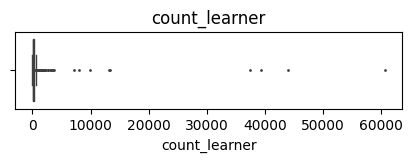

In [41]:
columns = 'count_learner'
boxing(group, columns)


Looking at the table and the box plot above, it seems that Coursera did not perform well in the awareness step of the marketing funnel. 75% of specializations have less than 289 learners with an average of only 558 learners for each specialization. This is very low for an international platform, although we must keep in mind that some courses may be newer and less exposed to the learners than others.<br>
Nevertheless, as we can see in the box plot below, the retention rate is between 41 to 52 percent which is not bad.

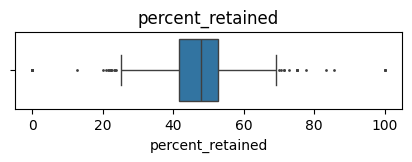

In [42]:
columns = 'percent_retained'
boxing(group, columns)

Let's check the domain of most participated and most retained specializations.

In [43]:
group.sort_values(by='count_learner', ascending=False).head(20)

,count_learner,count_retained,domain,percent_retained
specialization_id,,,,
kr43OcbTEeqeNBKhfgCLyw,60669,36385.0,Data Science,59.97
fq9UWMbTEeqpthJ2RmWGow,43936,27409.0,Business,62.38
Z-5wCcbTEeqeNBKhfgCLyw,39282,24019.0,Computer Science,61.15
7lHCSlFIEeeffRIHljDI_g,37436,21515.0,Information Technology,57.47
dwzq23ZLEei12goo904QNg,13424,7378.0,Data Science,54.96
W62RsyrdEeeFQQqyuQaohA,13263,6915.0,Data Science,52.14
7_nEU3iaEeiVXgoT1iWlYg,9901,5328.0,Information Technology,53.81
F-h1g0w7EeWeOApO_l5R1w,8029,3924.0,Computer Science,48.87
7qRy6fOWEeqIvgrCa-MVgQ,7221,3878.0,Data Science,53.70


In [44]:
group.sort_values(by='count_learner', ascending=False).head(30)
# group.sort_values(by='count_learner', ascending=False).tail(30)


,count_learner,count_retained,domain,percent_retained
specialization_id,,,,
kr43OcbTEeqeNBKhfgCLyw,60669,36385.0,Data Science,59.97
fq9UWMbTEeqpthJ2RmWGow,43936,27409.0,Business,62.38
Z-5wCcbTEeqeNBKhfgCLyw,39282,24019.0,Computer Science,61.15
7lHCSlFIEeeffRIHljDI_g,37436,21515.0,Information Technology,57.47
dwzq23ZLEei12goo904QNg,13424,7378.0,Data Science,54.96
W62RsyrdEeeFQQqyuQaohA,13263,6915.0,Data Science,52.14
7_nEU3iaEeiVXgoT1iWlYg,9901,5328.0,Information Technology,53.81
F-h1g0w7EeWeOApO_l5R1w,8029,3924.0,Computer Science,48.87
7qRy6fOWEeqIvgrCa-MVgQ,7221,3878.0,Data Science,53.70


The head and tail of our data show that the most and least popular specializations are one of Business, Computer Science, IT, or Data Science. This information is not very conclusive as we don't have the distribution of domains. Let's calculate the distribution of the domains.

In [45]:
columns = 'domain'
distribution = group[columns].value_counts(normalize=True)

In [46]:
group['domain'].value_counts(normalize=True).head(4).sum()

np.float64(0.7479784366576819)

75% of the specialization domains are Business, Computer Science, IT, and Data Science. But let's check the distribution of the popularity of specializations.

In [47]:
columns = 'specialization_domain'
participation = df1[columns].value_counts(normalize=True)

In [48]:
domain = pd.DataFrame({'Distribution%':(distribution * 100).round(2), 'Participation%':(participation * 100).round(2)})
domain['Popularity'] = domain['Participation%'] / domain['Distribution%']

retain = df1.groupby(columns, observed=False)['is_retained'].mean()
domain['Retain%'] = (retain * 100).round(2)
domain.sort_values(by='Popularity', ascending=False)


,Distribution%,Participation%,Popularity,Retain%
Data Science,17.12,34.16,1.995327,54.53
Information Technology,10.92,15.71,1.438645,53.89
Computer Science,18.87,18.07,0.957605,54.72
Business,27.90,23.73,0.850538,55.87
Arts and Humanities,3.37,2.52,0.747774,50.93
Language Learning,4.58,1.70,0.371179,45.02
Personal Development,1.75,0.57,0.325714,48.60
Health,6.33,1.76,0.278041,51.86
Social Sciences,3.23,0.75,0.232198,52.38
Math and Logic,0.94,0.21,0.223404,44.94


91% of learners took Data Science, Computer Science, IT, and Business specializations while these four courses comprise 75% of all specializations.<br>
I have defined a new metric to assess the popularity of a domain by dividing percentage of learners in each domain by percentage of courses in that domain and named it Popularity. Data science and IT have the highest popularity, which are greater than one. These numbers mean that the percentage of learners in this domanis is higher than percentage of these domains among all domains.<br>
At the buttom we see Social Sciences, Math and Logic, and Physical Science and Engineering with passions near 0.2. These specialization domanis need more investment in the awareness step of the marketing funnel.<br>
Generally, the most popular a course is the higher retain rate it has.
We have to keep this point in mind while preparing features for our machine learning model. Because the number of specializations is so high if we want to dumify them we have 741 features only for specialization. Therefore, instead of using specilization name or ID as a feature, we use their popularity to predict churn.

In [49]:
cols1 = ['Distribution%', 'Participation%']
cols2 = ['Popularity', 'Retain%']
print('Sum\n', domain.sort_values(by='Popularity', ascending=False)[cols1].head(5).sum())
print('Average\n', domain.sort_values(by='Popularity', ascending=False)[cols2].head(5).mean())


Sum
 Distribution%     78.18
Participation%    94.19
dtype: float64
Average
 Popularity     1.197978
Retain%       53.988000
dtype: float64


In [50]:
cols1 = ['Distribution%', 'Participation%']
cols2 = ['Popularity', 'Retain%']
print('Sum\n', domain.sort_values(by='Popularity', ascending=False)[cols1].tail(6).sum())
print('Average\n', domain.sort_values(by='Popularity', ascending=False)[cols2].tail(6).mean())


Sum
 Distribution%     21.82
Participation%     5.80
dtype: float64
Average
 Popularity     0.265477
Retain%       48.596667
dtype: float64


The top popular courses comprise 78% of all courses on Coursera while they attract 94% learners, their average popularity score is 1.2 and average retention rate is 54%.<br>
On the other hand, we have the less popular specializations which comprose 22% of the courses on Coursera and take only 6% of attentions. Their average popularity is only 0.26 and their average retention rate is 48.6%.<br>
This means that popularity can make a good criteria for predicting the retention of a learner in their specialization.

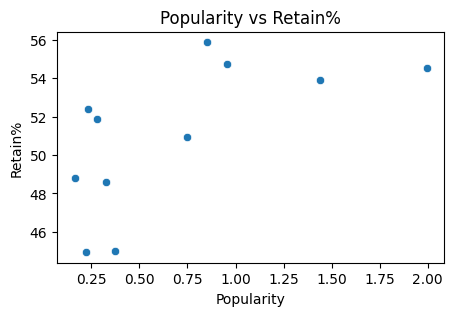

In [51]:
columns = ['Popularity', 'Retain%']
scattering(domain, columns)

From the above chart we can see that Retention and Popularity are nonlinearly related. For lower Popularities, the Retantion increases rapidly, while for higher Popularities the rate of increase is much lower. Mathematicaly the relationship is like $y = \sqrt{x}$.<br>
Now let's add popularity as a column to our dataset.

In [52]:
domain.index.name = 'specialization_domain'
right = domain.reset_index()[['specialization_domain', 'Popularity']]
df2 = pd.merge(df1, right, on='specialization_domain')
df2[['specialization_domain', 'Popularity']].head(10)

,specialization_domain,Popularity
0,Data Science,1.995327
1,Data Science,1.995327
2,Business,0.850538
3,Information Technology,1.438645
4,Data Science,1.995327
5,Data Science,1.995327
6,Computer Science,0.957605
7,Business,0.850538
8,Computer Science,0.957605
9,Data Science,1.995327


### 4 `cnt_courses_in_specialization`
**Specialization Info - number of courses in the specialization**

In [53]:
columns = 'cnt_courses_in_specialization'
df2[columns].value_counts(normalize=True)

cnt_courses_in_specialization
5.0     0.260199
4.0     0.184893
6.0     0.172633
8.0     0.165480
7.0     0.111481
3.0     0.042002
10.0    0.040613
9.0     0.020258
13.0    0.002326
12.0    0.000114
Name: proportion, dtype: float64

Specializations with 3-6 courses attracted 65.8% of the participation. We may be tempted to jump into the conclusion that the lower the number of courses in the specialization, the more favorable they are. However, let's calculate the distribution of courses in specializations on Coursera, before jumping into this conclusion.

In [54]:
columns = ['specialization_id']
g = df2.groupby(columns, observed=False)['cnt_courses_in_specialization']
l = []
for i in g:
    u = i[1].unique()
    if len(u) > 1:
        l.append(u)
print(len(l), l, sep='\n')

29
[array([7., 8.]), array([4., 5.]), array([9., 8.]), array([5., 4.]), array([6., 5.]), array([6., 5.]), array([4., 6.]), array([7., 6.]), array([5., 3.]), array([4., 3.]), array([10., 12.]), array([8., 9.]), array([8., 6.]), array([3., 5.]), array([5., 6.]), array([6., 7.]), array([9., 8.]), array([10.,  9.]), array([5., 4.]), array([5., 6.]), array([4., 5.]), array([4., 3.]), array([5., 4.]), array([8., 7.]), array([3., 4.]), array([4., 3.]), array([5., 4.]), array([3., 4.]), array([3., 4.])]


29 specializations are recorded with two cnt_courses_in_specialization, which does not make sense. I don't know why this happened, but as a solution, I decided to assign the count with higher repitition for these specializations. Let's examin if this works.

In [55]:
column = ['specialization_id']
columns = ['specialization_id', 'cnt_courses_in_specialization']

cnt_course = df2.groupby(column, observed=False)[['cnt_courses_in_specialization']].transform(lambda x: x.value_counts().index[0])
cnt_course.head()

,cnt_courses_in_specialization
0,8.0
1,6.0
2,6.0
3,5.0
4,8.0


Now, we should have no specializations with two diferent cnt_courses_in_specialization.

In [56]:
columns = ['specialization_id']
temp = df2[columns].copy()
temp['corrected'] = cnt_course
g = temp.groupby(columns, observed=False)['corrected']
l = []
for i in g:
    u = i[1].unique()
    if len(u) > 1:
        l.append(u)
print(len(l), l, sep='\n')

0
[]


In [57]:
df1['cnt_courses_in_specialization'] = temp['corrected']

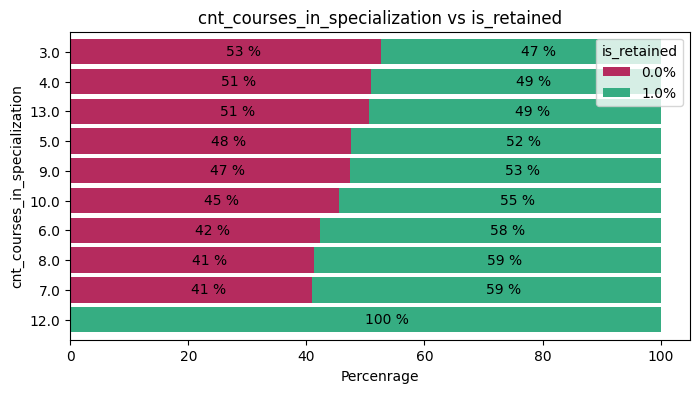

In [58]:
columns = ['cnt_courses_in_specialization', 'is_retained']
baring(df2, columns, stacked=True)

I can't find any consistent patterns between the number of courses in the specialization and their retention. By pattern, I mean saying something like the more the number of courses in the specialization, the higher the rate of retention.<br>
Let's resort to t-test to examine if mean course in specializetion is different between churned and retained learners.

In [59]:
columns = 'cnt_courses_in_specialization'
target = 'is_retained'
t_test_mean(df2, columns, target)


Rejection Region = (0.99, 1.01)
f statistics = 0.96

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(38.3877937666623), pvalue=np.float64(0.0), df=np.float64(398393.8923376306))
Mean of retained: 6.0
Mean of churned: 5.8
Mean of all: 5.9

Median of retained: 6.0
Median of churned: 5.0
Median of all: 6.0

STD of retained: 1.7
STD of churned: 1.8
STD of all: 1.8


'The p-value in this case is 0.0, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean cnt_courses_in_specialization between churned and retained learners.'

In [60]:
columns = 'cnt_courses_in_specialization'
target = 'is_retained'
t_test_mean_manual(df2, columns, target)


Variance1 = 3.021779873282504, Variance2 = 3.1603587067234096
Mean1 = 6.022843710981067, Mean2 = 5.812034811701306
Significance Interval = (0.025000000000000022, 0.975)
Rejection Region = (0.99, 1.01)
f statistics = 0.96

Population variances are not equal.
t statistics = 38.3877937666632
Rejection Criteria: t statistics not in the (-1.9599699391435743, 1.9599699391435743) interval


The statistical tests show that on average, the larger the count of courses in the specializetion, the higher the rate of retention.

### 5 `specialization_domain`
**Specialization Info - primary domain of the specialization (Computer Science, Data Science, etc.)**

In [61]:
columns = ['specialization_domain']
grouping(df2, columns)


specialization_domain
Data Science                        34.16
Business                            23.73
Computer Science                    18.07
Information Technology              15.71
Arts and Humanities                  2.52
Health                               1.76
Language Learning                    1.70
Physical Science and Engineering     0.81
Social Sciences                      0.75
Personal Development                 0.57
Math and Logic                       0.21
Name: proportion, dtype: float64

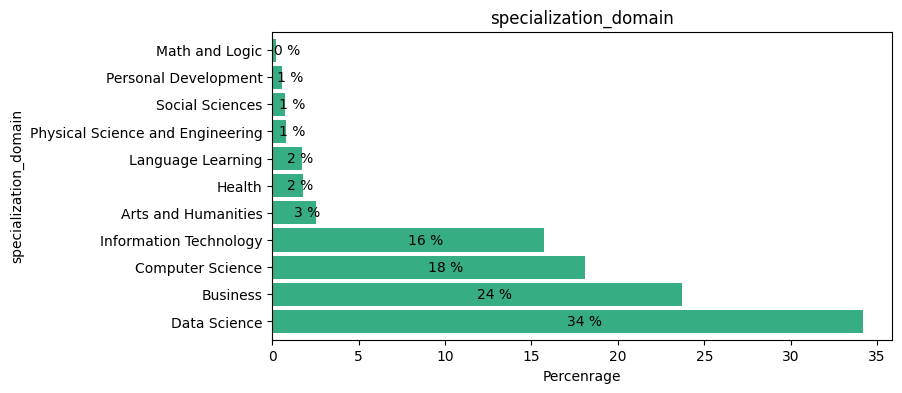

In [62]:
columns = ['specialization_domain']
baring(df2, columns, size=(8,4), annotate=True, grid=False)

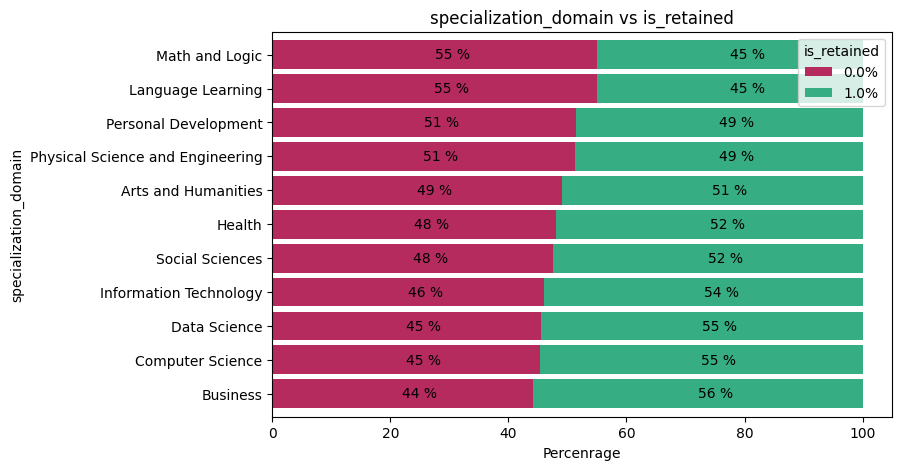

In [63]:
columns = ['specialization_domain', 'is_retained']
baring(df2, columns, size=(8,5), annotate=True, grid=False, stacked=True)

90% of learners took Data Science, Computer Science, IT, and Business courses. I attribute this number to two main reasons;
- Coursera started as a platform for teaching data science and computer science. So, at the time of this survey, there were definitely more tech and business courses than other fields on the platform.
- In the recent years, there was a lot of buzz around Data Science, Computer Science, and Business. Society and economy promise better opportunities for growth in these fields. I think the prospect of landing in a sexy, high-paying, and exciting job is so attractive to people that they crowd for these courses and retain to the end.

Some specialization domains, namely Math & Logic and Language Learning have higher churn rate than others. This should be investigated through surveys and focus groups to find the reasons.<br>
In general, we can divide the domains into more popular and less popular courses. The two charts above say that the more popular a domain, the more retention.<br>


### 6 `is_professional_certificate`
**Specialization Info - BOOLEAN for whether the specialization is a "professional certicate" (a special type of specialization that awards completers with an industry-sponsored credential)**

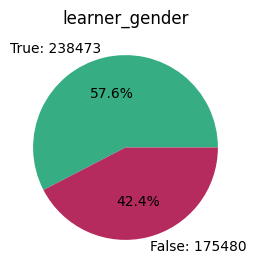

In [64]:
columns = 'is_professional_certificate'
paing(df2, columns)

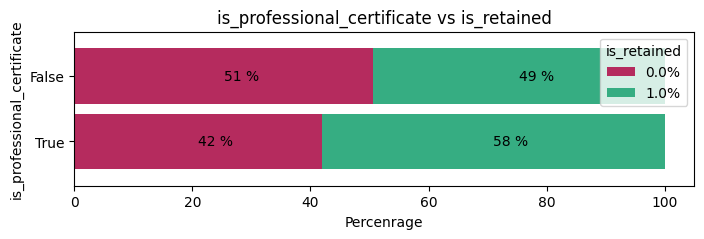

In [65]:
columns = ['is_professional_certificate', 'is_retained']
baring(df2, columns, size=(8,2), grid=False, stacked=True)


In [66]:
columns = 'is_retained'
target = 'is_professional_certificate'

z_test_two_proportions(df2, columns, target, significance=0.95)


n1, n2, x1, x2 238473 175480 138462 86589
p1 = 0.581, p2 = 0.493, p = 0.544
Significance Interval = (0.025, 0.975)
z statistics = 55.64918257482527
The rejection criteria: z statistics not in the -1.96, 1.96 interval.


There is overwhelming evidence that retention is higher in professional certificates.<br>
Professional certificates are more attractive to take and retain with. I can suggest two possible reasons for this trend;
- The promise of finishing prefessional crtificates from prestigious institutes is so alluring.
- After finishing one course in a professional certificate learners extend their subscription to move on to the next course in the specialization.

### 7 `is_gateway_certificate`
**Specialization Info - BOOLEAN for whether the specialization is a "gateway certificate" (a special type of specialization geared towards learners starting in a new field)**

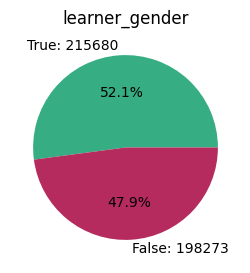

In [67]:
columns = 'is_gateway_certificate'
paing(df2, columns)

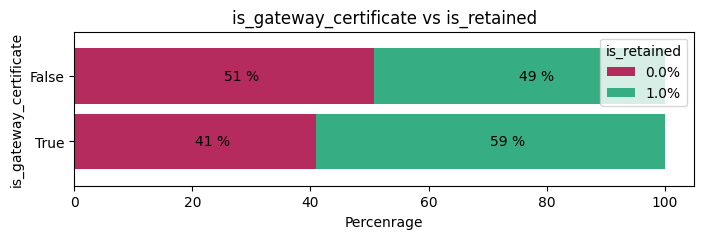

In [68]:
columns = ['is_gateway_certificate', 'is_retained']
baring(df2, columns, size=(8,2), grid=False, stacked=True)


In [69]:
columns = 'is_retained'
target = 'is_gateway_certificate'

z_test_two_proportions(df2, columns, target, significance=0.95)


n1, n2, x1, x2 215680 198273 127335 97716
p1 = 0.59, p2 = 0.493, p = 0.544
Significance Interval = (0.025, 0.975)
z statistics = 62.94970353276939
The rejection criteria: z statistics not in the -1.96, 1.96 interval.


The z-test of two population proportions show that there is statistically significant difference between retention rate of professional certificates and nonprofessional certificates.

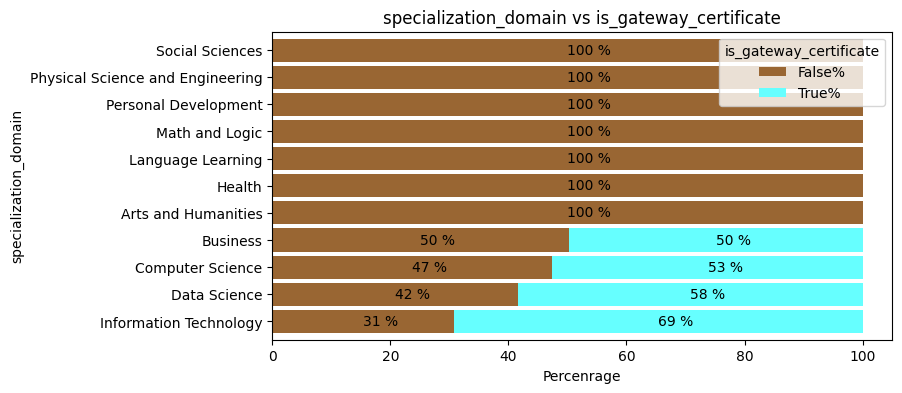

In [70]:
columns = ['specialization_domain', 'is_gateway_certificate']
baring(df2, columns, stacked=True, colors=['#996633', '#66FFFF'])

It's really interesting to see that the most popular courses with the highest retention rates are gateway courses for at least 50% of the learners.<br>
If I ignore the well-know quote, "Correlation does not mean causation" for a while and try to fit a cause and effect model to this behavior, based on my own experience and watching my friend's bahavior on Coursera, I believe that: They are gateway courses -> They are popular -> Their retention is highter.<br>
OK! Let's return back to "Correlation does not mean causation" :-D


### 8 `learner_days_since_registration`
**Learner Info - Days from coursera registration date to the date on which the observation is made**

In [71]:
columns = 'learner_days_since_registration'
df2[columns].describe()

count    413953.000000
mean        745.107128
std         950.801071
min           0.000000
25%          71.000000
50%         279.000000
75%        1109.000000
max        3857.000000
Name: learner_days_since_registration, dtype: float64

329.0 28761.48


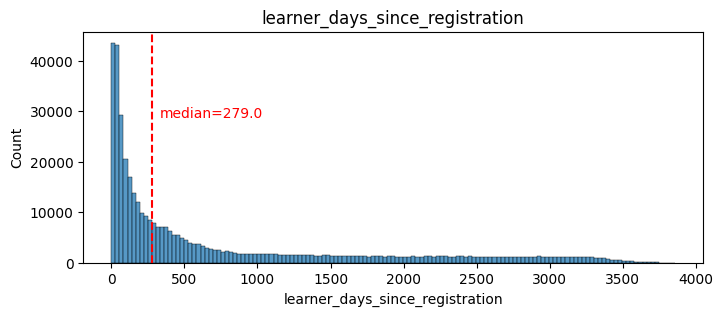

In [72]:
columns = 'learner_days_since_registration'
histing(df2, columns, size=(8,3))

132.0 7127.34


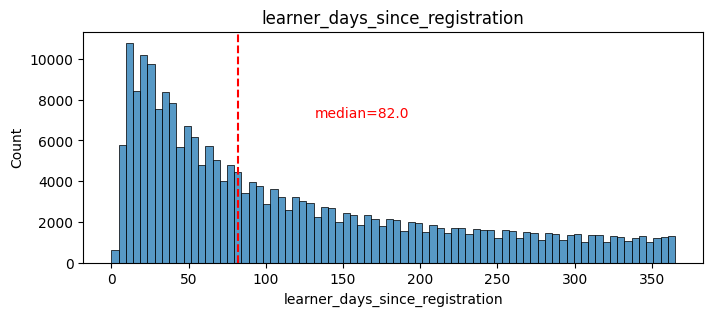

In [73]:
columns = 'learner_days_since_registration'
df_year = df2[df2[columns] <= 365]
histing(df_year, columns, size=(8,3))


In [74]:
df_year.shape[0] / df2.shape[0]

0.5549470592072047

The learner_days_since_registration is highly skewed to the right with a median of 279 days. 55.4% of learners are in their first years of registration. Of those in their first year, 50% have registered in less than 83 days ago.<br>
This means that over 25% of learners have tenure of less than 83 days.

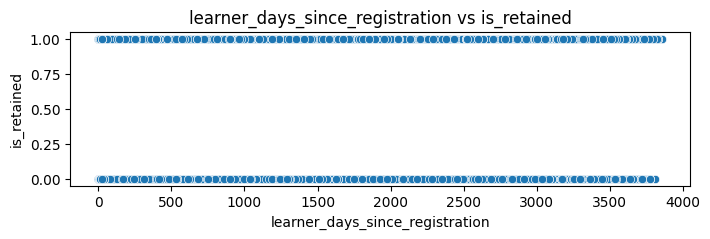

In [75]:
columns = ['learner_days_since_registration', 'is_retained']
scattering(df2, columns, size=(8,2))

The scatter plot does not reveal any information about any possible relationships between registration days and retention rate. Let's examine the disribution of the retaind and churned learners.

Text(0.5, 1.0, 'Distribution of Churned')

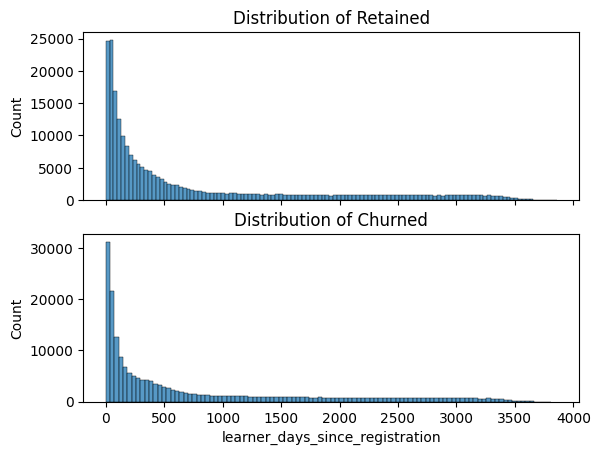

In [76]:
columns = 'learner_days_since_registration'
retained = df2[df2['is_retained'] == True]
churned = df2[df2['is_retained'] == False]

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
sns.histplot(x=retained[columns], ax=ax1)
sns.histplot(x=churned[columns], ax=ax2)

ax1.set_title('Distribution of Retained')
ax2.set_title('Distribution of Churned')


The distribution of the learner_days_since_registration columns does not show any difference between churned and retained learners. For a more objective judgment, let's resort to the t-test of the two populations means.

In [77]:
columns = 'learner_days_since_registration'
target = 'is_retained'
t_test_mean(df2, columns, target)

Rejection Region = (0.99, 1.01)
f statistics = 1.03

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(1.706922036263132), pvalue=np.float64(0.08783731342139524), df=np.float64(403675.31684840575))
Mean of retained: 747.4
Mean of churned: 742.4
Mean of all: 745.1

Median of retained: 275.0
Median of churned: 285.0
Median of all: 279.0

STD of retained: 957.6
STD of churned: 942.6
STD of all: 950.8


"The p-value in this case is 0.08783731342139524, which is above the standard thresholds of 0.05. So we don't reject the null hypothesis in favor of the alternative hypothesis and say there is no statistically significant difference in mean learner_days_since_registration between churned and retained learners."

In [78]:
columns = 'learner_days_since_registration'
target = 'is_retained'
t_test_mean_manual(df2, columns, target)

Variance1 = 917048.468923993, Variance2 = 888495.0888985179
Mean1 = 747.4149637193348, Mean2 = 742.3576563509121
Significance Interval = (0.025000000000000022, 0.975)
Rejection Region = (0.99, 1.01)
f statistics = 1.03

Population variances are not equal.
t statistics = 1.7069220362631845
Rejection Criteria: t statistics not in the (-1.9599698612288396, 1.9599698612288396) interval


### 9 `learner_country_group`
**Learner Info - The region of the world that the learner is from (United States, East Asia, etc.)**

In [79]:
columns = 'learner_country_group'
(df2[columns].value_counts(normalize=True) * 100).round(2)

learner_country_group
United States                        47.24
Northern Europe                       9.96
India                                 5.77
Non-Brazil Latin America              5.56
East Asia                             4.74
Canada                                4.44
Southern Europe                       4.26
Southeast Asia                        3.31
Africa and developing Middle East     3.03
Eastern Europe                        2.95
Middle East                           2.55
Russia and neighbors                  2.12
Australia and New Zealand             1.91
Brazil                                1.48
China                                 0.67
Name: proportion, dtype: float64

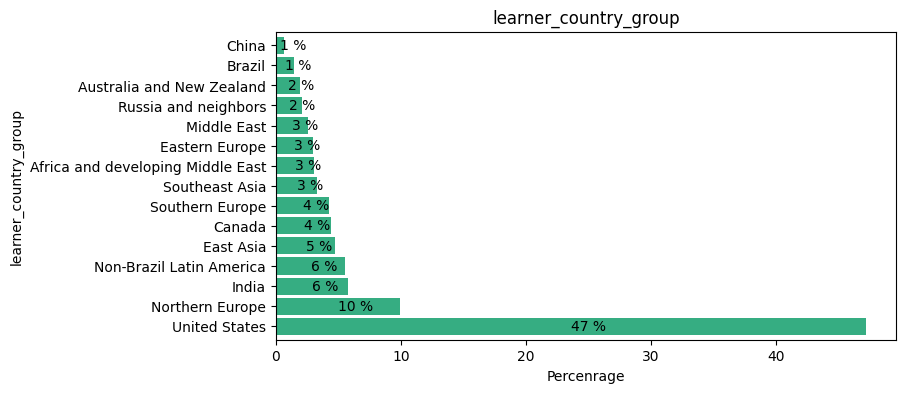

In [80]:
columns = ['learner_country_group']
baring(df2, columns)

Not surprisingly, nearly half of the learners are from US. Next come Northern Europe, India, and Non-Brazil Latin America with 9.96, 5.77, and 5.56 percents respectively. The remaining regions are below 5%, China being the lowest with only 0.67%, which is kind of a surprise considering their population.<br>
In my opinion, this gap is mainly due to more familiarity with Coursera in the US and affordabolity of costs in these regions.

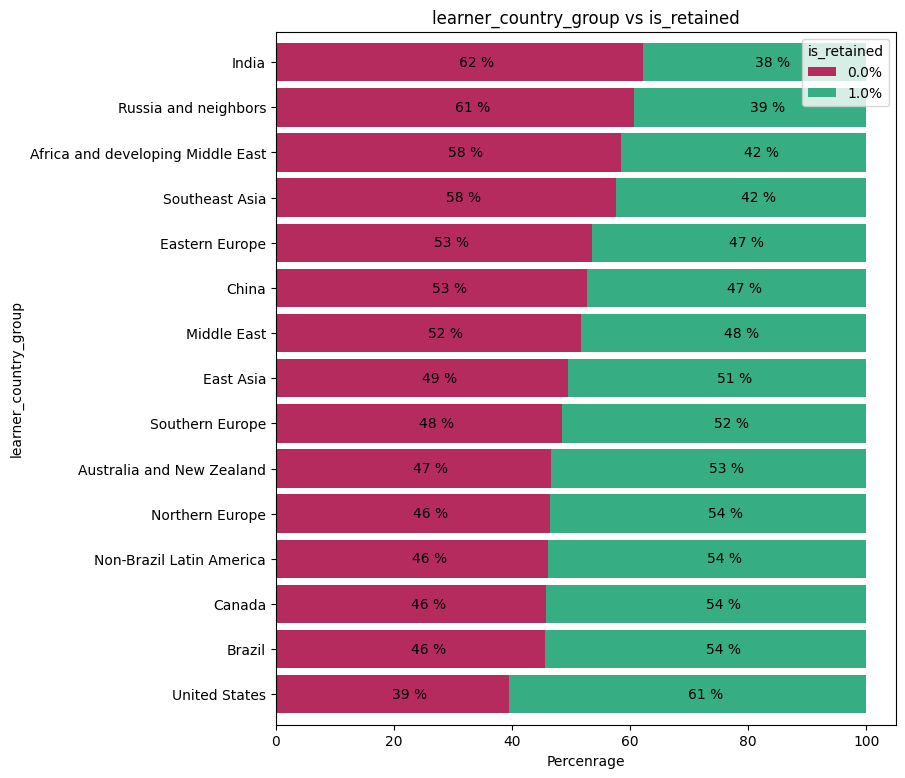

In [81]:
columns = ['learner_country_group', 'is_retained']
baring(df2, columns, size=(8,9), annotate=True, stacked=True)

Retention in regions differs considerably. On one side we have US with 61% retention and on the other side we have India and Russia & neighbirs with nearly 38% of retension. Indians being the second major learners on Coursera, have the highest churn rate, play a major role in decreasing the overal retention rate.

### 10 `learner_gender`
**Learner Info - The reported gender of the learner (if not available, then "unknown")**<br>
Some people argue that we should not includ gender in our analysis and avoid selecting it as a feature when training machine learning models. But I believe that being loyal or non-loyal to Coursera is a subjective concept and should not be judjed as good or bad. Unloyalty to a platform is more of a feature than a bug.<br>
**So, gender is included :-)**

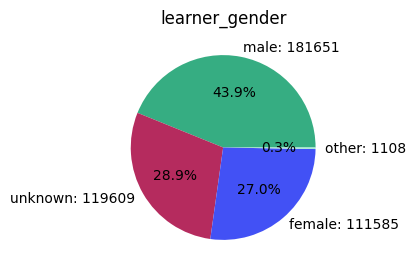

In [82]:
columns = 'learner_gender'
colors = ['#36ad82','#b52b5e', '#4251f5','#a9ebd3',  '#f7e6f3']

paing(df2, columns, colors=colors)

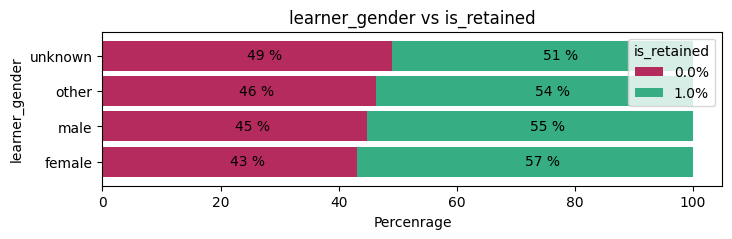

In [83]:
columns = ['learner_gender', 'is_retained']
baring(df2, columns, stacked=True, size=(8,2))

The are more men on Coursera than wemen, by a factor of 150%. However the retention rate is not different between the two groups. So gender is not correlated with retention.

### 11 `learner_cnt_other_courses_active`
**Learner Info - Other courses (not in this specialization) in which the learner was active prior to observation_dt**

In [84]:
columns = 'learner_cnt_other_courses_active'
df2[columns].value_counts(normalize=True).head(20)

learner_cnt_other_courses_active
0.0     0.444246
1.0     0.142714
2.0     0.076441
3.0     0.053405
4.0     0.035748
5.0     0.031204
6.0     0.024614
7.0     0.018966
8.0     0.015267
9.0     0.012721
10.0    0.010622
11.0    0.009025
12.0    0.007803
16.0    0.007525
13.0    0.007199
17.0    0.007061
14.0    0.006211
15.0    0.005940
18.0    0.005670
19.0    0.004397
Name: proportion, dtype: float64

44.2% of learners have no other active coursers. 78.4% have at moste 5 active courses. Let's examin if the number of active courses is different for retained and churned learners.

In [85]:
columns = 'learner_cnt_other_courses_active'
target = 'is_retained'
t_test_mean(df2, columns, target)

Rejection Region = (0.99, 1.01)
f statistics = 0.58

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(-46.73676088530326), pvalue=np.float64(0.0), df=np.float64(348284.3472423966))
Mean of retained: 4.5
Mean of churned: 6.5
Mean of all: 5.4

Median of retained: 1.0
Median of churned: 1.0
Median of all: 1.0

STD of retained: 11.9
STD of churned: 15.7
STD of all: 13.8


'The p-value in this case is 0.0, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean learner_cnt_other_courses_active between churned and retained learners.'

### 12 `learner_cnt_other_courses_paid_active`
**Learner Info - Other courses (not in this specialization) in which the learner was active prior to observation_dt and was a paid enrollee**

In [86]:
columns = 'learner_cnt_other_courses_paid_active'
df2[columns].value_counts(normalize=True).head(20)


learner_cnt_other_courses_paid_active
0.0     0.703048
1.0     0.108326
2.0     0.047945
3.0     0.028489
4.0     0.021365
5.0     0.020712
6.0     0.014028
7.0     0.009175
8.0     0.008709
9.0     0.007117
10.0    0.005457
11.0    0.004013
12.0    0.003148
13.0    0.002672
14.0    0.002300
15.0    0.001754
16.0    0.001481
17.0    0.001319
18.0    0.001203
19.0    0.000969
Name: proportion, dtype: float64

Again, this column is highly skewed to the right. 70.3% of learners have no other paid active courses and 93% have at most 5 other paid active courses.<br>
Let's repeat our t-test to examine if there is any differences between churned and retained learners.

In [87]:
columns = 'learner_cnt_other_courses_paid_active'
target = 'is_retained'
t_test_mean(df2, columns, target)

Rejection Region = (0.99, 1.01)
f statistics = 0.57

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(-32.26842157333585), pvalue=np.float64(4.2451971423868744e-228), df=np.float64(346255.4602041279))
Mean of retained: 1.1
Mean of churned: 1.5
Mean of all: 1.3

Median of retained: 0.0
Median of churned: 0.0
Median of all: 0.0

STD of retained: 3.2
STD of churned: 4.3
STD of all: 3.7


'The p-value in this case is 4.2451971423868744e-228, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean learner_cnt_other_courses_paid_active between churned and retained learners.'

### 13 `learner_cnt_other_courses_items_completed`
**Learner Info - Items completed in other courses (not in this specialization) prior to the observation_dt**

In [88]:
columns = 'learner_cnt_other_courses_items_completed'
df2[columns].value_counts(normalize=True).head(20)


learner_cnt_other_courses_items_completed
0.0     0.444246
3.0     0.020278
1.0     0.017669
2.0     0.016429
4.0     0.009810
6.0     0.008687
5.0     0.008501
7.0     0.007624
8.0     0.006979
9.0     0.006266
10.0    0.006109
11.0    0.005571
12.0    0.005423
13.0    0.005235
14.0    0.004810
15.0    0.004744
19.0    0.004684
16.0    0.004351
33.0    0.004155
21.0    0.004051
Name: proportion, dtype: float64

Once again the data in this column is skewed. But it's skewedness level is not as high as the previous columns we have already explored. Let's perform t-test.

In [89]:
columns = 'learner_cnt_other_courses_items_completed'
target = 'is_retained'
t_test_mean(df2, columns, target)

Rejection Region = (0.99, 1.01)
f statistics = 0.51

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(-48.27742011729722), pvalue=np.float64(0.0), df=np.float64(333238.8701054012))
Mean of retained: 92.9
Mean of churned: 139.8
Mean of all: 114.3

Median of retained: 2.0
Median of churned: 10.0
Median of all: 4.0

STD of retained: 251.8
STD of churned: 353.7
STD of all: 303.5


'The p-value in this case is 0.0, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean learner_cnt_other_courses_items_completed between churned and retained learners.'

### 14 `learner_cnt_other_courses_paid_items_completed`
**Learner Info - Items completed in other courses (not in this specialization) prior to the observation_dt, where the learner was a paid enrollee**

In [90]:
columns = 'learner_cnt_other_courses_paid_items_completed'
df2[columns].value_counts(normalize=True).head(20)


learner_cnt_other_courses_paid_items_completed
0.0     0.703048
1.0     0.008189
2.0     0.007129
3.0     0.005614
4.0     0.004237
7.0     0.003116
5.0     0.003068
6.0     0.002778
8.0     0.002532
9.0     0.002384
10.0    0.002283
11.0    0.002193
12.0    0.002157
15.0    0.001978
16.0    0.001966
14.0    0.001957
13.0    0.001821
20.0    0.001807
19.0    0.001771
17.0    0.001713
Name: proportion, dtype: float64

The data in this column is extremely skewed. 70% of the learners completed no items in other paid courses prior to observation date. We see exactly the same behavior in the learner_cnt_other_courses_paid_active. Let's run t-test.

In [91]:
columns = 'learner_cnt_other_courses_paid_items_completed'
target = 'is_retained'
t_test_mean(df2, columns, target)


Rejection Region = (0.99, 1.01)
f statistics = 0.6

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(-35.21864299430335), pvalue=np.float64(3.081987066372068e-271), df=np.float64(352735.67876373435))
Mean of retained: 53.0
Mean of churned: 74.8
Mean of all: 62.9

Median of retained: 0.0
Median of churned: 0.0
Median of all: 0.0

STD of retained: 170.1
STD of churned: 219.0
STD of all: 194.3


'The p-value in this case is 3.081987066372068e-271, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean learner_cnt_other_courses_paid_items_completed between churned and retained learners.'

### 15 `learner_cnt_other_transactions_past`
**Learner Info - Other payments that the learner made on Coursera separate from this subscription**

In [92]:
columns = 'learner_cnt_other_transactions_past'
df2[columns].value_counts(normalize=True).head(20)


learner_cnt_other_transactions_past
0.0     0.676987
1.0     0.096153
2.0     0.051704
3.0     0.033414
4.0     0.025232
5.0     0.018306
6.0     0.014654
7.0     0.011866
8.0     0.009552
9.0     0.007549
10.0    0.006520
11.0    0.005549
12.0    0.004585
13.0    0.003793
14.0    0.003510
15.0    0.003051
16.0    0.002628
17.0    0.002208
18.0    0.001971
19.0    0.001684
Name: proportion, dtype: float64

Like previous columns, this column is skewed to the right. 67.7% of learners have no other transactions and 88.3 have at most 5 other transactions. Let's test if the number of other transactions is different between churned and retained learners.

In [93]:
columns = 'learner_cnt_other_transactions_past'
target = 'is_retained'
t_test_mean(df2, columns, target)

Rejection Region = (0.99, 1.01)
f statistics = 1.57

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(13.53590571089769), pvalue=np.float64(9.798395477471172e-42), df=np.float64(412937.9229263409))
Mean of retained: 2.1
Mean of churned: 1.8
Mean of all: 2.0

Median of retained: 0.0
Median of churned: 0.0
Median of all: 0.0

STD of retained: 7.1
STD of churned: 5.7
STD of all: 6.5


'The p-value in this case is 9.798395477471172e-42, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean learner_cnt_other_transactions_past between churned and retained learners.'

### 16 `learner_other_revenue`
**Learner Info - US Dollar estimate of other payments that the learner made on Coursera separate from this subscription**

In [94]:
columns = 'learner_other_revenue'
df2[columns].value_counts(normalize=True).head(20)


learner_other_revenue
0.00      0.676992
49.00     0.030025
39.00     0.016690
98.00     0.013692
78.00     0.009189
147.00    0.007977
79.00     0.007035
196.00    0.005873
117.00    0.005034
245.00    0.003747
156.00    0.003242
294.00    0.002979
343.00    0.002387
88.00     0.002372
9.99      0.002302
29.00     0.001993
195.00    0.001969
392.00    0.001797
128.00    0.001677
59.00     0.001643
Name: proportion, dtype: float64

In [95]:
df1[columns].describe()

count    413953.000000
mean        101.281377
std         353.680276
min           0.000000
25%           0.000000
50%           0.000000
75%          49.000000
max       24069.920000
Name: learner_other_revenue, dtype: float64

67% of learners did not make any other payments.

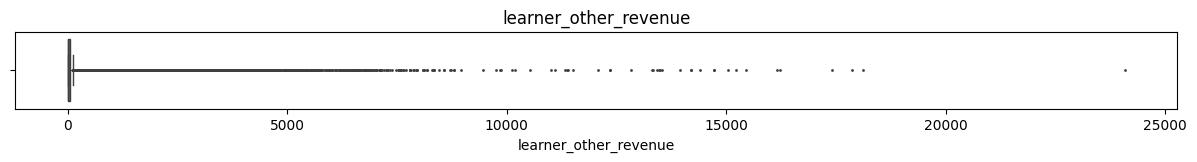

In [96]:
columns = 'learner_other_revenue'

boxing(df2, columns, size=(15,1))

This column is extremely skewed to the right. Let's perform t-test.

In [97]:
columns = 'learner_other_revenue'
target = 'is_retained'
t_test_mean(df2, columns, target)


Rejection Region = (0.99, 1.01)
f statistics = 1.57

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(13.794018663010785), pvalue=np.float64(2.830944221480527e-43), df=np.float64(412947.6860289444))
Mean of retained: 108.1
Mean of churned: 93.2
Mean of all: 101.3

Median of retained: 0.0
Median of churned: 0.0
Median of all: 0.0

STD of retained: 387.0
STD of churned: 309.1
STD of all: 353.7


'The p-value in this case is 2.830944221480527e-43, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean learner_other_revenue between churned and retained learners.'

There is a significant difference in the learner_other_revenue between churned and retained learners. Retained learners made higher amounts of revenue than churned learners.

### 17 `subscription_period_order`
**Subscription Status - An index of the "month" of the subcription; 1 = first month of payment, 2 = second month of payment, etc.**

In [98]:
columns = 'subscription_period_order'
df2[columns].value_counts(normalize=True)

subscription_period_order
1.0     0.498619
2.0     0.195754
3.0     0.103393
4.0     0.061855
5.0     0.041092
6.0     0.028769
7.0     0.020763
8.0     0.014436
9.0     0.010158
10.0    0.007467
11.0    0.005592
12.0    0.004046
13.0    0.002957
14.0    0.002256
15.0    0.001568
16.0    0.000887
17.0    0.000268
18.0    0.000116
19.0    0.000002
Name: proportion, dtype: float64

Once again, we have an extremely skewed column. 50% are in their first month of subscription.<br>
Let's examine the retain rate among each group.

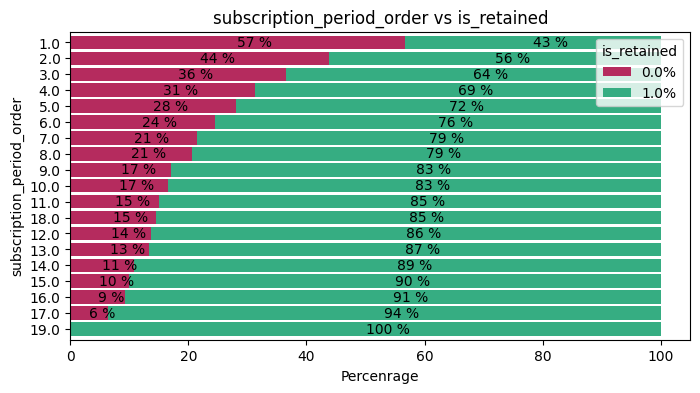

In [99]:
columns = ['subscription_period_order', 'is_retained']
baring(df1, columns, stacked=True)

The rule of engagement is working nicely here. The further learners engage with a product or service, the higher chances of retention. This rule is used extensively by lots of social media platforms to engage and retain their users. For example, Facebook knows that if they incentivize their users to make 10 connections in their first week, the chance of user experience the AHA moment with the platofrm and as a result the probability of retention will increase by 68%.<br>
So, to rewrite this rule for Coursera, if the learner is encouraged to extend their susbcription in the first month, their retention rate will increase by 30%. If they extend for one more month, their retantion rate will increase by 59%.<br>
Which is great, isn't it?? ;-)

In [100]:
columns = 'subscription_period_order'
target = 'is_retained'
t_test_mean(df2, columns, target)

Rejection Region = (0.99, 1.01)
f statistics = 2.68

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(161.3160483376853), pvalue=np.float64(0.0), df=np.float64(379999.17284448596))
Mean of retained: 3.0
Mean of churned: 1.9
Mean of all: 2.5

Median of retained: 2.0
Median of churned: 1.0
Median of all: 2.0

STD of retained: 2.7
STD of churned: 1.7
STD of all: 2.4


'The p-value in this case is 0.0, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean subscription_period_order between churned and retained learners.'

t-test verifies that the more learners are engaged with their specialization, the more likely they will retain.

### 18 `days_since_last_payment`
**Subscription Status - Days since the last payment in the subscription**

In [101]:
columns = 'days_since_last_payment'
df2[columns].value_counts(normalize=True)

days_since_last_payment
0.0     0.068244
1.0     0.049882
2.0     0.044314
3.0     0.041708
4.0     0.040700
5.0     0.038350
6.0     0.037656
7.0     0.036700
8.0     0.035139
10.0    0.034917
9.0     0.034813
11.0    0.033796
12.0    0.033129
13.0    0.032595
14.0    0.031830
16.0    0.030745
15.0    0.030612
17.0    0.030414
18.0    0.030206
19.0    0.030008
20.0    0.029810
21.0    0.028696
22.0    0.027834
23.0    0.027600
24.0    0.026501
25.0    0.026032
26.0    0.025387
27.0    0.023739
28.0    0.022592
29.0    0.014606
30.0    0.001437
31.0    0.000005
Name: proportion, dtype: float64

62.0 18645.0


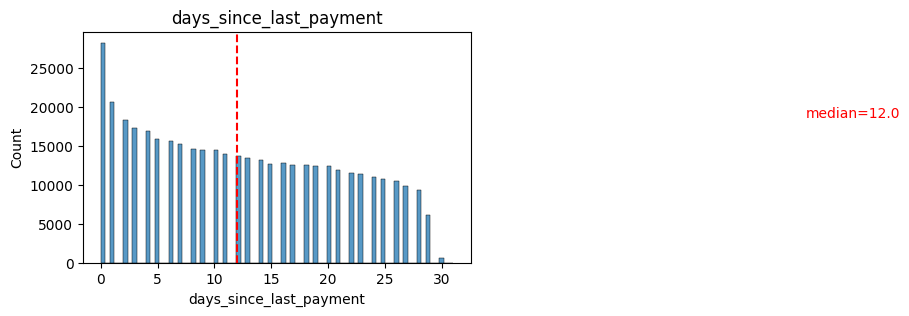

In [102]:
columns = 'days_since_last_payment'
histing(df2, columns)

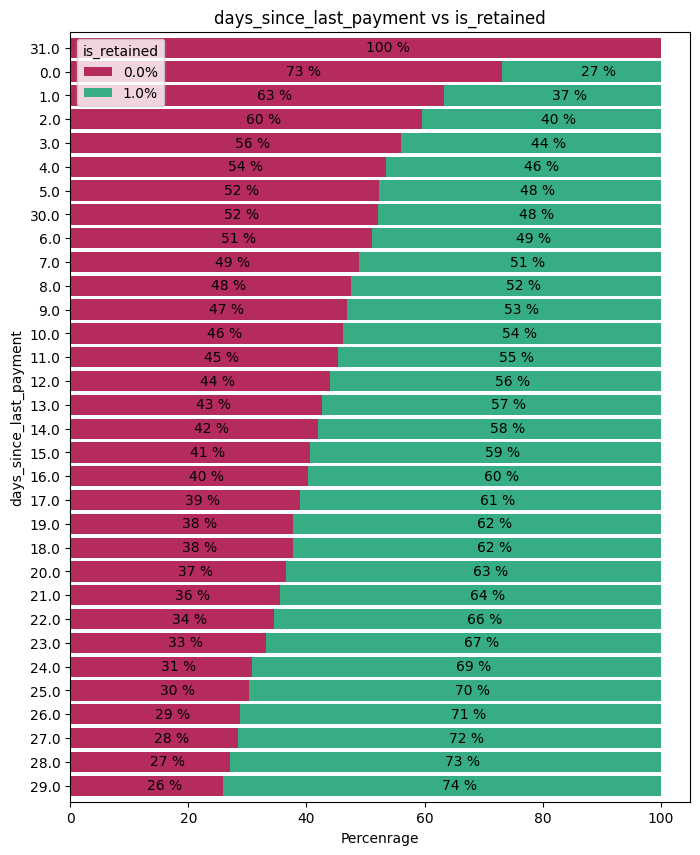

In [103]:
columns = ['days_since_last_payment', 'is_retained']
baring(df2, columns, stacked=True, size=(8,10))

In [104]:
columns = 'days_since_last_payment'
target = 'is_retained'
t_test_mean(df2, columns, target)


Rejection Region = (0.99, 1.01)
f statistics = 1.04

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(152.8833814455586), pvalue=np.float64(0.0), df=np.float64(404194.2506701111))
Mean of retained: 14.2
Mean of churned: 10.2
Mean of all: 12.4

Median of retained: 14.0
Median of churned: 9.0
Median of all: 12.0

STD of retained: 8.5
STD of churned: 8.3
STD of all: 8.7


'The p-value in this case is 0.0, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean days_since_last_payment between churned and retained learners.'

To judge if this column and the result of the t-test makes sense, I need more information about the data in this column, how it is collected and how it should be interpreted.<br>
A shallow analysis shows that the greater the value, the higher the chance of retention.

### 19 `days_til_next_payment_due`
**Subscription Status - Days until the next payment in the subsciption is due**

In [105]:
columns = 'days_til_next_payment_due'
df2[columns].value_counts(normalize=True)

days_til_next_payment_due
29.0    0.051646
27.0    0.044191
28.0    0.042821
26.0    0.041744
30.0    0.039427
25.0    0.039029
24.0    0.038461
23.0    0.037118
22.0    0.035789
20.0    0.035427
21.0    0.035265
19.0    0.033997
18.0    0.033513
17.0    0.033122
16.0    0.032320
15.0    0.031045
14.0    0.030760
13.0    0.030663
11.0    0.030574
12.0    0.030194
10.0    0.029955
9.0     0.029300
8.0     0.028160
7.0     0.028010
6.0     0.027032
5.0     0.026745
3.0     0.026104
4.0     0.025991
2.0     0.025054
1.0     0.024819
31.0    0.001718
32.0    0.000007
Name: proportion, dtype: float64

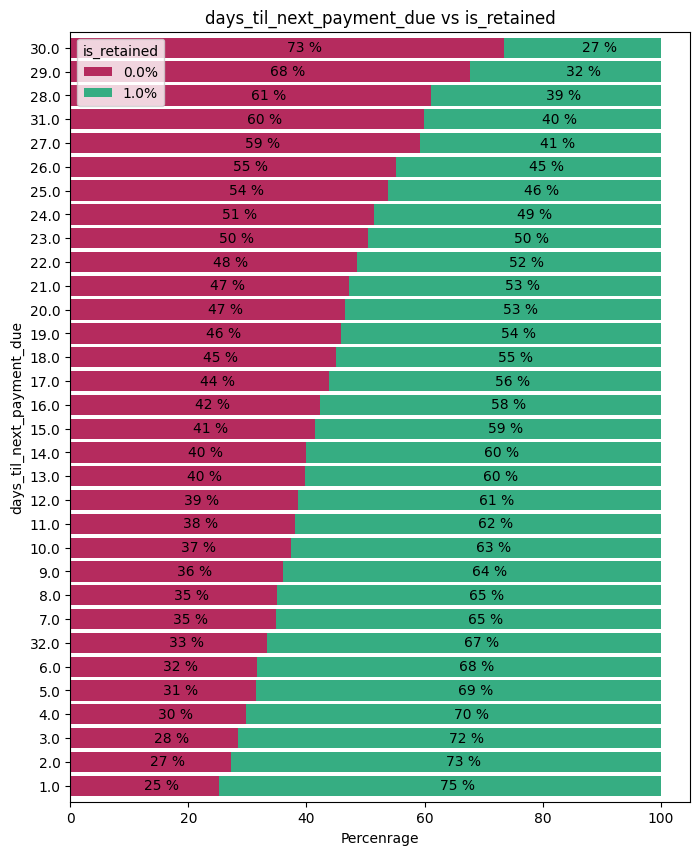

In [106]:
columns = ['days_til_next_payment_due', 'is_retained']
baring(df2, columns, stacked=True, size=(8,10))

In [107]:
columns = 'days_til_next_payment_due'
target = 'is_retained'
t_test_mean(df2, columns, target)


Rejection Region = (0.99, 1.01)
f statistics = 1.04

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(-154.36190085420878), pvalue=np.float64(0.0), df=np.float64(404391.08486590703))
Mean of retained: 15.2
Mean of churned: 19.3
Mean of all: 17.1

Median of retained: 15.0
Median of churned: 21.0
Median of all: 18.0

STD of retained: 8.5
STD of churned: 8.3
STD of all: 8.7


'The p-value in this case is 0.0, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean days_til_next_payment_due between churned and retained learners.'

This column is in some sense the opposite of the previous colomn and the result of t-test verifies this. Although I have the same ambiguities as the previous column with this one, a general conclusion is that the more days to the next payment due, the higher churn.

### 20 `cnt_enrollments_started_before_payment_period`
**Subscription Activity - Courses in the subscription specialization that were enrolled prior to the start of this subscription period**

In [108]:
columns = 'cnt_enrollments_started_before_payment_period'
# df2[columns].value_counts(normalize=True)
df2[columns].value_counts(normalize=False)


cnt_enrollments_started_before_payment_period
1.0     231081
2.0      74610
3.0      33958
4.0      23013
0.0      18144
5.0      15198
6.0       7908
7.0       5008
8.0       3142
9.0        991
10.0       855
12.0        20
11.0        13
13.0        12
Name: count, dtype: int64

In [109]:
columns = 'cnt_enrollments_started_before_payment_period'
target = 'is_retained'
t_test_mean(df2, columns, target)


Rejection Region = (0.99, 1.01)
f statistics = 0.76

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(-18.281974609832687), pvalue=np.float64(1.2408084282636644e-74), df=np.float64(377182.9531857208))
Mean of retained: 1.8
Mean of churned: 1.9
Mean of all: 1.9

Median of retained: 1.0
Median of churned: 1.0
Median of all: 1.0

STD of retained: 1.5
STD of churned: 1.7
STD of all: 1.6


'The p-value in this case is 1.2408084282636644e-74, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean cnt_enrollments_started_before_payment_period between churned and retained learners.'

### 21 `cnt_enrollments_completed_before_payment_period`
**Subscription Activity - Courses in the subscription specialization that were completed prior to the start of this subscription period**

In [110]:
columns = 'cnt_enrollments_completed_before_payment_period'
df2[columns].value_counts(normalize=True)


cnt_enrollments_completed_before_payment_period
0.0     0.645143
1.0     0.176136
2.0     0.071187
3.0     0.046447
4.0     0.026281
5.0     0.016671
6.0     0.009796
7.0     0.004950
8.0     0.002172
9.0     0.001082
10.0    0.000087
12.0    0.000027
11.0    0.000022
Name: proportion, dtype: float64

We have another column in this data which is `cnt_courses_in_specialization`. As mentioned in the intorduction, some learners churn because they finish their specialization and reach their learning goal. Let's explore these columns together.

In [111]:
temp = df2[['cnt_courses_in_specialization', 'cnt_enrollments_completed_before_payment_period', 'is_retained']].copy()
temp['percent_done'] = (100 * temp['cnt_enrollments_completed_before_payment_period'] / temp['cnt_courses_in_specialization']).round(2)
temp.head(5)

,cnt_courses_in_specialization,cnt_enrollments_completed_before_payment_period,is_retained,percent_done
0,8.0,4.0,1.0,50.0
1,6.0,0.0,0.0,0.0
2,6.0,0.0,0.0,0.0
3,5.0,1.0,1.0,20.0
4,8.0,1.0,0.0,12.5


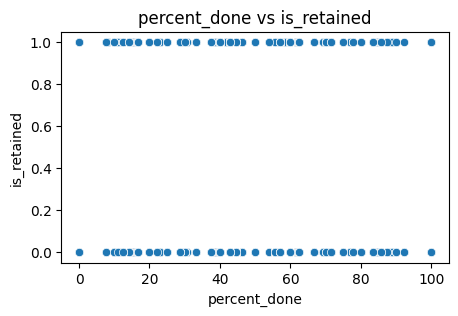

In [112]:
columns = ['percent_done', 'is_retained']
scattering(temp, columns)

The scatter plot does not reveal and conclusive information. Let's perform t-test to see whether there is any difference in precentage of courses completed among churned and retained learners.

In [113]:
columns = 'percent_done'
target = 'is_retained'
t_test_mean(temp, columns, target)


Rejection Region = (0.99, 1.01)
f statistics = 0.71

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(-30.9297646943417), pvalue=np.float64(8.823160428645023e-210), df=np.float64(370213.33698017226))
Mean of retained: 11.4
Mean of churned: 13.5
Mean of all: 12.4

Median of retained: 0.0
Median of churned: 0.0
Median of all: 0.0

STD of retained: 19.4
STD of churned: 23.0
STD of all: 21.1


'The p-value in this case is 8.823160428645023e-210, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean percent_done between churned and retained learners.'

The t-test reveals that on average, churned learners have completed more course in their specialization than retained. This conclusion is conforming with the statement we mentioned earlier in the intorduction.

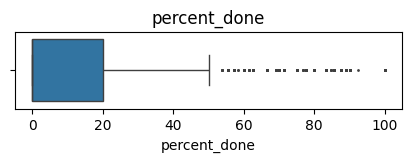

In [114]:
retained = temp[temp['is_retained'] == True]
churned = temp[temp['is_retained'] == False]
columns = 'percent_done'
boxing(retained, columns)


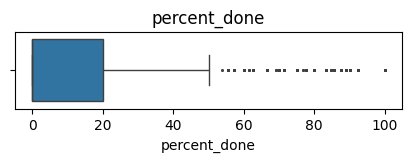

In [115]:
columns = 'percent_done'
boxing(churned, columns)


In [116]:
churned.describe()

,cnt_courses_in_specialization,cnt_enrollments_completed_before_payment_period,is_retained,percent_done
count,188902.000000,188902.000000,188902.0,188902.000000
mean,5.812035,0.816863,0.0,13.476919
std,1.777740,1.496435,0.0,23.023479
min,3.000000,0.000000,0.0,0.000000
25%,4.000000,0.000000,0.0,0.000000
50%,5.000000,0.000000,0.0,0.000000
75%,7.000000,1.000000,0.0,20.000000
max,13.000000,12.000000,0.0,100.000000


In [117]:
retained.describe()

,cnt_courses_in_specialization,cnt_enrollments_completed_before_payment_period,is_retained,percent_done
count,225051.000000,225051.000000,225051.0,225051.000000
mean,6.022844,0.727528,1.0,11.408640
std,1.738327,1.314250,0.0,19.360355
min,3.000000,0.000000,1.0,0.000000
25%,5.000000,0.000000,1.0,0.000000
50%,6.000000,0.000000,1.0,0.000000
75%,7.000000,1.000000,1.0,20.000000
max,13.000000,12.000000,1.0,100.000000


75.0 14043.480000000001


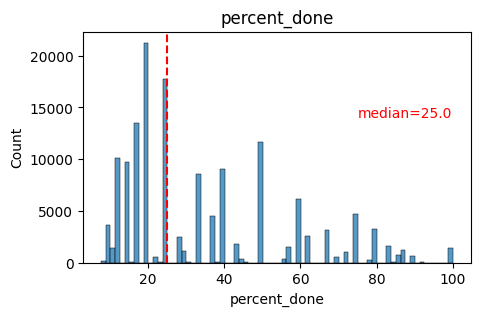

In [118]:
columns = 'percent_done'
nonzero = temp[temp[columns]>0]
histing(nonzero, columns)

64% of learners are taking their first course in the specialization. Median is 25 and the histogram shows that most learners are in their first steps with the current specialization.

### 22 `cnt_enrollments_active_before_payment_period`
**Subscription Activity - Courses in the subscription specialization that were active prior to the start of this subscription period**

In [119]:
columns = 'cnt_enrollments_active_before_payment_period'
df2[columns].value_counts(normalize=True)

cnt_enrollments_active_before_payment_period
1.0     0.500257
0.0     0.156486
2.0     0.153986
3.0     0.075407
4.0     0.049407
5.0     0.029900
6.0     0.016420
7.0     0.009745
8.0     0.005090
9.0     0.001981
10.0    0.001237
12.0    0.000046
11.0    0.000029
13.0    0.000010
Name: proportion, dtype: float64

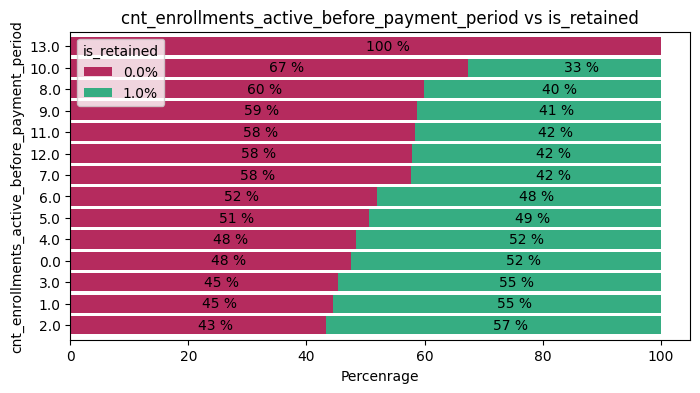

In [120]:
columns = ['cnt_enrollments_active_before_payment_period', 'is_retained']
baring(df2, columns, stacked=True)


In general, the less the active enrolments before payment, the higher the likelihood of retention.

In [121]:
columns = 'cnt_enrollments_active_before_payment_period'
target = 'is_retained'
t_test_mean(df2, columns, target)

Rejection Region = (0.99, 1.01)
f statistics = 0.78

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(-20.4572591665039), pvalue=np.float64(5.810712649774174e-93), df=np.float64(380558.43736498285))
Mean of retained: 1.6
Mean of churned: 1.7
Mean of all: 1.6

Median of retained: 1.0
Median of churned: 1.0
Median of all: 1.0

STD of retained: 1.5
STD of churned: 1.6
STD of all: 1.5


'The p-value in this case is 5.810712649774174e-93, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean cnt_enrollments_active_before_payment_period between churned and retained learners.'

### 23 `cnt_items_completed_before_payment_period`
**Subscription Activity - Items in the subscription specialization that were completed prior to the start of the subscription period**

In [122]:
columns = 'cnt_items_completed_before_payment_period'
target = 'is_retained'
t_test_mean(df2, columns, target)


Rejection Region = (0.99, 1.01)
f statistics = 0.85

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(-6.81727131237782), pvalue=np.float64(9.292050620313469e-12), df=np.float64(388445.69836042775))
Mean of retained: 88.0
Mean of churned: 90.9
Mean of all: 89.3

Median of retained: 38.0
Median of churned: 37.0
Median of all: 37.0

STD of retained: 126.8
STD of churned: 137.7
STD of all: 131.9


'The p-value in this case is 9.292050620313469e-12, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean cnt_items_completed_before_payment_period between churned and retained learners.'

In general, churned learners have completed more items before payment period. It is very likely because learners have completed all their items and courses in the specialization, reached their learning goals and then left.

### 24	`cnt_graded_items_completed_before_payment_period`
**Subscription Activity - Graded items (assignments) in the subscription speciallzation that were completed prior to the start of the subscription period**

In [123]:
columns = 'cnt_graded_items_completed_before_payment_period'
target = 'is_retained'
t_test_mean(df2, columns, target)


Rejection Region = (0.99, 1.01)
f statistics = 0.71

Population variances are not equal.
ttest output TtestResult(statistic=np.float64(-26.611698296618496), pvalue=np.float64(6.978561438427119e-156), df=np.float64(370032.0692420215))
Mean of retained: 6.2
Mean of churned: 7.1
Mean of all: 6.6

Median of retained: 2.0
Median of churned: 2.0
Median of all: 2.0

STD of retained: 9.8
STD of churned: 11.6
STD of all: 10.7


'The p-value in this case is 6.978561438427119e-156, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean cnt_graded_items_completed_before_payment_period between churned and retained learners.'

In general, churned learners have completed more graded items before payment period. It is very likely because learners have completed all their items and courses in the specialization, reached their learning goals and then left.

### 25	`is_subscription_started_with_free_trial`
**Subscription Activity - BOOLEAN for whether or not the subscription started with a free trial (7-day period for the learner to sample the specialization before paying)**

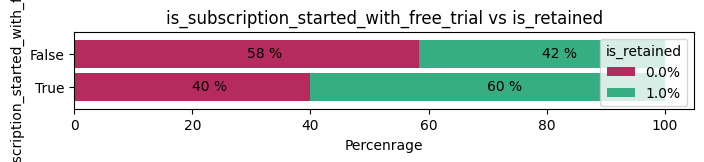

In [124]:
columns = ['is_subscription_started_with_free_trial', 'is_retained']
baring(df2, columns, stacked=True, size=(8,1))

Learners who started with a free trial are 150% more likely to retain. I don't know what may be the reason.

In [125]:
columns = 'is_subscription_started_with_free_trial'
target = 'is_retained'
z_test_two_proportions(df2, columns, target)


n1, n2, x1, x2 225051 188902 171980 114385
p1 = 0.764, p2 = 0.606, p = 0.692
Significance Interval = (0.025, 0.975)
z statistics = 110.11028057474888
The rejection criteria: z statistics not in the -1.96, 1.96 interval.


The z-test shows that the difference in is_subscription_started_with_free_trial between churned and retained learners is statically significant.

### 26 `cnt_enrollments_started_during_payment_period`
**Current Subscription Activity - Courses in the subscription specialization that were enrolled during this subscription period (before observation_dt)**

In [126]:
columns = 'cnt_enrollments_started_during_payment_period'
df2[columns].value_counts(normalize=True)

cnt_enrollments_started_during_payment_period
0.0     0.805599
1.0     0.141475
2.0     0.031482
3.0     0.011893
4.0     0.005609
5.0     0.002179
6.0     0.000901
7.0     0.000507
8.0     0.000256
9.0     0.000065
10.0    0.000031
13.0    0.000002
Name: proportion, dtype: float64

It's strange to see that more than 80% of learners started zero enrollments during payment period. Again, I don't have any explanation for this pattern.

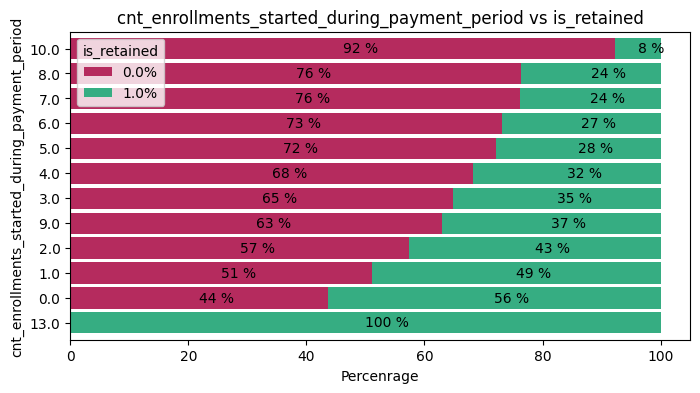

In [127]:
columns = ['cnt_enrollments_started_during_payment_period', 'is_retained']
baring(df1, columns, stacked=True)


Excluding 13, in general, the more enrollments a learner starts during payment period, the less likely they will retain. 

In [128]:
columns = 'cnt_enrollments_started_during_payment_period'
target = 'is_retained'
t_test_mean_manual(df2, columns, target)

Variance1 = 0.3638810027898337, Variance2 = 0.6955003005207435
Mean1 = 0.22377594411933296, Mean2 = 0.3587892134545955
Significance Interval = (0.025000000000000022, 0.975)
Rejection Region = (0.99, 1.01)
f statistics = 0.52

Population variances are not equal.
t statistics = -58.65328086480954
Rejection Criteria: t statistics not in the (-1.9599710294643038, 1.9599710294643038) interval


Churned learners start more enrollment during the payment period. 

### 27	`cnt_enrollments_completed_during_payment_period`	
**Current Subscription Activity	- Courses in the subscription specialization that were completed during this subscription period (before observation_dt)**


In [129]:
columns = 'cnt_enrollments_completed_during_payment_period'
df2[columns].value_counts(normalize=True)

cnt_enrollments_completed_during_payment_period
0.0     0.838970
1.0     0.117291
2.0     0.025981
3.0     0.010216
4.0     0.004532
5.0     0.001826
6.0     0.000664
7.0     0.000307
8.0     0.000164
9.0     0.000041
10.0    0.000007
Name: proportion, dtype: float64

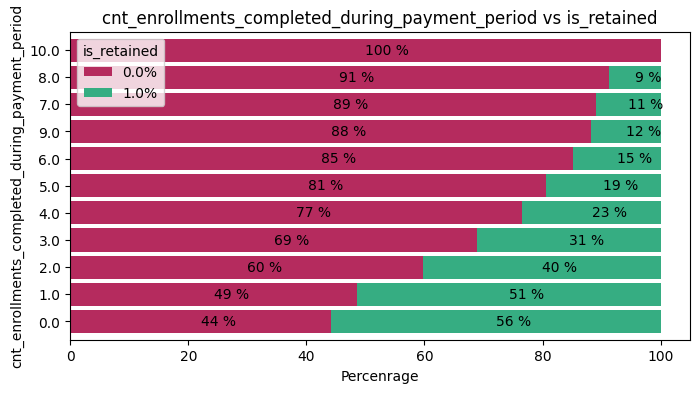

In [130]:
columns = ['cnt_enrollments_completed_during_payment_period', 'is_retained']
baring(df2, columns, stacked=True)

84% of learners completed 0 enrollments during payment period, and 56% of them retained. The more enrollments a learner completes during a payment period, the less likely they retain. Probably, because they finish the specialization and leave Coursera.

In [131]:
columns = 'cnt_enrollments_completed_during_payment_period'
target = 'is_retained'
t_test_mean_manual(df2, columns, target)

Variance1 = 0.2676185664320264, Variance2 = 0.6145854986178673
Mean1 = 0.1797503676944337, Mean2 = 0.30093381753501813
Significance Interval = (0.025000000000000022, 0.975)
Rejection Region = (0.99, 1.01)
f statistics = 0.44

Population variances are not equal.
t statistics = -57.494234274863196
Rejection Criteria: t statistics not in the (-1.9599714749023784, 1.9599714749023784) interval


### 28	`cnt_enrollments_active_during_payment_period`
**Current Subscription Activity - Courses in the subscription specialization that were active during this subscription period (before observation_dt)**


In [132]:
columns = 'cnt_enrollments_active_during_payment_period'
df2[columns].value_counts(normalize=True)

cnt_enrollments_active_during_payment_period
0.0     0.534595
1.0     0.325923
2.0     0.093837
3.0     0.027061
4.0     0.011175
5.0     0.004534
6.0     0.001727
7.0     0.000631
8.0     0.000403
9.0     0.000070
10.0    0.000039
11.0    0.000005
Name: proportion, dtype: float64

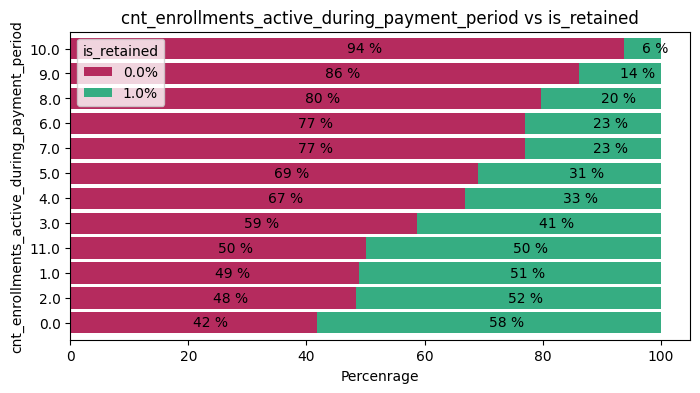

In [133]:
columns = ['cnt_enrollments_active_during_payment_period', 'is_retained']
baring(df2, columns, stacked=True)


In [134]:
columns = 'cnt_enrollments_active_during_payment_period'
target = 'is_retained'
t_test_mean_manual(df2, columns, target)

Variance1 = 0.7199381828169487, Variance2 = 1.0991099668773412
Mean1 = 0.5944741414168344, Mean2 = 0.7845814231718033
Significance Interval = (0.025000000000000022, 0.975)
Rejection Region = (0.99, 1.01)
f statistics = 0.66

Population variances are not equal.
t statistics = -63.30787752047492
Rejection Criteria: t statistics not in the (-1.9599705396621727, 1.9599705396621727) interval


The more active enrollments during payment period, the higher the rate of churn. Again, they are learners who finish their specialization and leave Coursera.

### 29	`cnt_items_completed_during_payment_period`
**Current Subscription Activity	- Items in the subscription specialization that were completed during this subscription period (before observation_dt**

In [135]:
columns = 'cnt_items_completed_during_payment_period'
target = 'is_retained'
t_test_mean_manual(df2, columns, target)

Variance1 = 1770.3719591932822, Variance2 = 3412.9867856595615
Mean1 = 17.91190441277755, Mean2 = 24.712083514203133
Significance Interval = (0.025000000000000022, 0.975)
Rejection Region = (0.99, 1.01)
f statistics = 0.52

Population variances are not equal.
t statistics = -42.226520312108335
Rejection Criteria: t statistics not in the (-1.959971049585117, 1.959971049585117) interval


Churned learners completed more items than retained learners. Again, probably because they finish their specialization and leave.

### 30 `cnt_graded_items_completed_during_payment_period`
**Current Subscription Activity - Graded items (assignments) in the subscription speciallzation that were completed during this subscription period (before observation_dt)**


In [136]:
columns = 'cnt_graded_items_completed_during_payment_period'
target = 'is_retained'
t_test_mean_manual(df2, columns, target)

Variance1 = 11.653803736598746, Variance2 = 28.60416339613679
Mean1 = 1.3671789949833593, Mean2 = 2.191326719674752
Significance Interval = (0.025000000000000022, 0.975)
Rejection Region = (0.99, 1.01)
f statistics = 0.41

Population variances are not equal.
t statistics = -57.81446915968228
Rejection Criteria: t statistics not in the (-1.9599716424177989, 1.9599716424177989) interval


### 31	`is_active_capstone_during_pay_period`
**Current Subscription Activity	boolean	BOOLEAN for whether the learner was active in a capstone course during this subscription period. The last course in some specializations is called a "captone" course as allows the learner to apply the skills they have learned in the prior courses up to that point.**


In [137]:
columns = 'is_active_capstone_during_pay_period'
df2[columns].value_counts()

is_active_capstone_during_pay_period
False    412867
True       1086
Name: count, dtype: int64

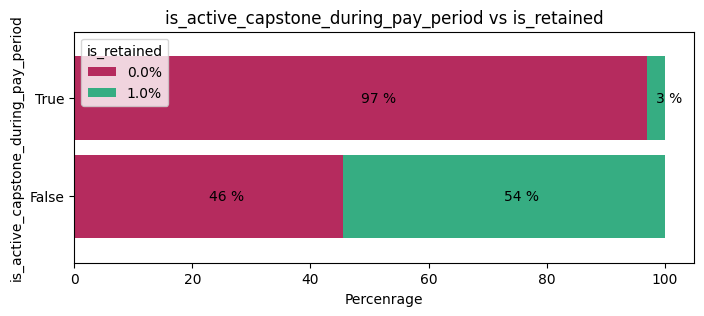

In [138]:
columns = ['is_active_capstone_during_pay_period', 'is_retained']
baring(df2, columns, stacked=True, size=(8,3))

In [139]:
columns = 'is_active_capstone_during_pay_period'
target = 'is_retained'
z_test_two_proportions(df2, columns, target)

n1, n2, x1, x2 225051 188902 33 1053
p1 = 0.0, p2 = 0.006, p = 0.003
Significance Interval = (0.025, 0.975)
z statistics = -34.00391702381891
The rejection criteria: z statistics not in the -1.96, 1.96 interval.


### 32	`sum_hours_learning_before_payment_period`
**Current Subscription Activity	numeric	Hours spent learning in subscription specialization courses prior to the subscription period**


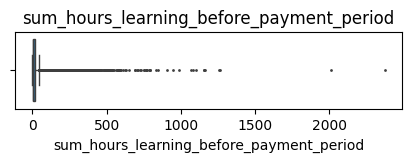

In [140]:
columns = 'sum_hours_learning_before_payment_period'
boxing(df2, columns)

In [141]:
columns = 'sum_hours_learning_before_payment_period'
target = 'is_retained'
t_test_mean_manual(df2, columns, target)

Variance1 = 674.2712129393307, Variance2 = 834.1675694200371
Mean1 = 15.223699887284807, Mean2 = 16.039711331801673
Significance Interval = (0.025000000000000022, 0.975)
Rejection Region = (0.99, 1.01)
f statistics = 0.81

Population variances are not equal.
t statistics = -9.478286168162688
Rejection Criteria: t statistics not in the (-1.959970164489315, 1.959970164489315) interval


The t-test shows that there is statistically significant difference in sum_hours_learning_before_payment_period between churned and retained learners.

### 33 `sum_hours_learning_during_payment_period`
**Current Subscription Activity	- Hours spent learning in subscription specialization courses during the subscription period (before observation_dt)**


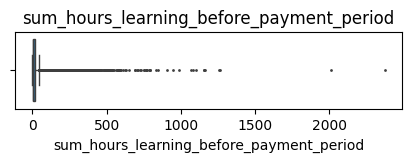

In [142]:
columns = 'sum_hours_learning_before_payment_period'
boxing(df2, columns)


In [143]:
columns = 'sum_hours_learning_before_payment_period'
target = 'is_retained'
t_test_mean_manual(df2, columns, target)

Variance1 = 674.2712129393307, Variance2 = 834.1675694200371
Mean1 = 15.223699887284807, Mean2 = 16.039711331801673
Significance Interval = (0.025000000000000022, 0.975)
Rejection Region = (0.99, 1.01)
f statistics = 0.81

Population variances are not equal.
t statistics = -9.478286168162688
Rejection Criteria: t statistics not in the (-1.959970164489315, 1.959970164489315) interval


### 34	'cnt_days_active_before_payment_period'
**Current Subscription Activity	integer	Days active in the subscription specialization prior to the subscription period**

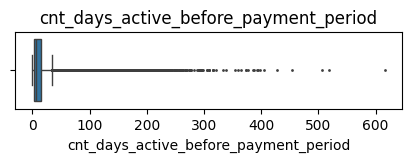

In [144]:
columns = 'cnt_days_active_before_payment_period'
boxing(df2, columns)

In [145]:
columns = 'cnt_days_active_before_payment_period'
target = 'is_retained'
t_test_mean_manual(df2, columns, target)

Variance1 = 367.38483007540646, Variance2 = 347.53931518728723
Mean1 = 12.981990748763614, Mean2 = 11.870747795153042
Significance Interval = (0.025000000000000022, 0.975)
Rejection Region = (0.99, 1.01)
f statistics = 1.06

Population variances are not equal.
t statistics = 18.8583760692745
Rejection Criteria: t statistics not in the (-1.9599698402097787, 1.9599698402097787) interval


### 35	`cnt_days_active_during_payment_period`
**Current Subscription Activity	integer	Days active thus far in the subscription period (before observation_dt)**


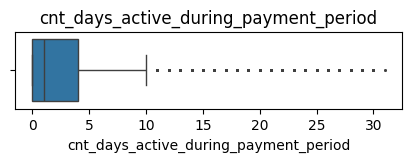

In [146]:
columns = 'cnt_days_active_during_payment_period'
boxing(df2, columns)

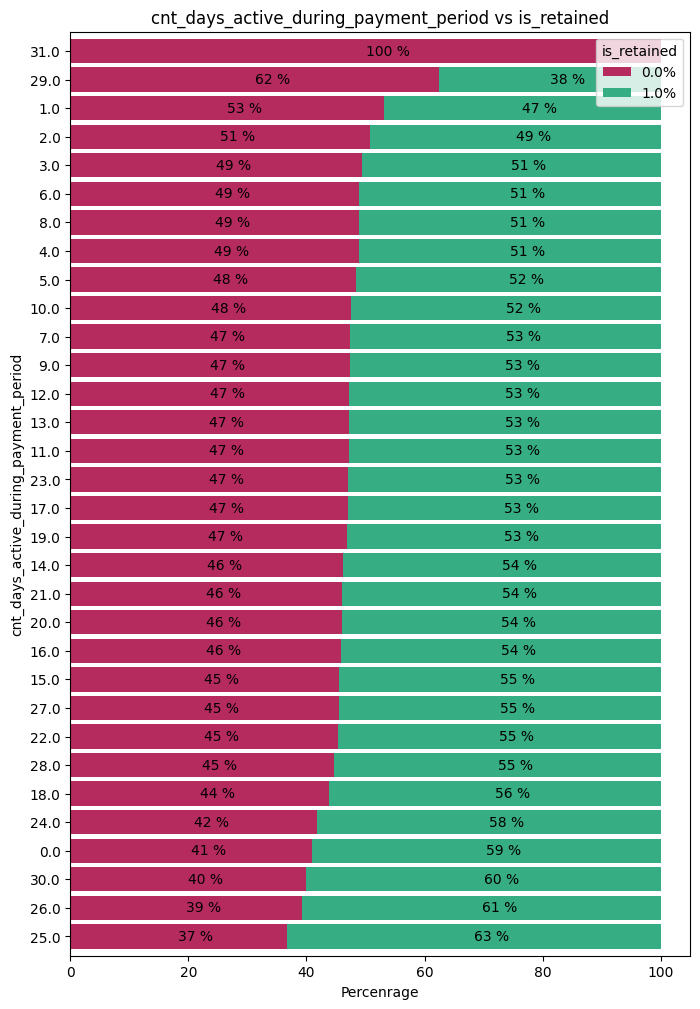

In [147]:
columns = ['cnt_days_active_during_payment_period', 'is_retained']
baring(df2, columns, stacked=True, size=(8,12))

In [148]:
columns = 'cnt_days_active_during_payment_period'
target = 'is_retained'
t_test_mean(df2, columns, target)

Rejection Region = (0.99, 1.01)
f statistics = 1.01

Population variances are equal.
ttest output TtestResult(statistic=np.float64(-19.678875297054013), pvalue=np.float64(3.583466963110083e-86), df=np.float64(413951.0))
Mean of retained: 2.5
Mean of churned: 2.7
Mean of all: 2.6

Median of retained: 0.0
Median of churned: 1.0
Median of all: 1.0

STD of retained: 4.1
STD of churned: 4.1
STD of all: 4.1


'The p-value in this case is 3.583466963110083e-86, which is below the standard thresholds of 0.05. So we reject the null hypothesis in favor of the alternative hypothesis and say there is a statistically significant difference in mean cnt_days_active_during_payment_period between churned and retained learners.'

### 36	`cnt_days_since_last_activity`
**Current Subscription Activity	integer	Days since the most recent activity date in the subscription (if never active, defaults to the number of days since the start of the subscription)**


59.0 49801.62


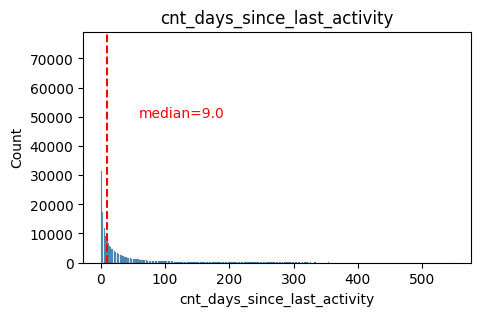

In [149]:
columns = 'cnt_days_since_last_activity'
histing(df2, columns)

In [150]:
columns = 'cnt_days_since_last_activity'
target = 'is_retained'
t_test_mean_manual(df2, columns, target)

Variance1 = 3867.1835762703427, Variance2 = 1187.3795803974976
Mean1 = 38.074263167015474, Mean2 = 18.47571756783941
Significance Interval = (0.025000000000000022, 0.975)
Rejection Region = (0.99, 1.01)
f statistics = 3.26

Population variances are not equal.
t statistics = 127.93046380142351
Rejection Criteria: t statistics not in the (-1.9599705362224544, 1.9599705362224544) interval


## Pickle the Prepared Dataframe

In [154]:
import pickle
with open('Data//coursera data.pickle', 'wb') as file:
    pickle.dump(df2, file) 
print('Done!')

Done!


## Conclusion
Exploratory analysis of this dataset shows that the fetures the specialization, the specific traits of the learner, and the status of the specializations all have a noticeable impact on the retention rate. Our dataset is balanced with respect to the 'is_retained' column, so we can move forward to creating machine learning models to predict retention.